***
# FISHER IRIS CLASSIFICATION
***
***
author --- louis tomczyk<br>
institution --- Xidian University<br>
student id --- 211.561.13.752<br>
date --- 2021.11.21<br>
course --- X2 CS 10 26 - Machine Learning<br>
contact --- <louis.tomczyk.work@gmail.com><br>
bibliography --- <br>
- __[Scikit-learn : Standard Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)__
- __[Scikit-learn : Train Test Split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)__
- __[Scikit-learn : One Vs One Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsOneClassifier.html)__
- __[Scikit-learn : Support Vector Machine](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)__
- __[Scikit-learn : K-Nearest Neighbours](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)__
- __[Scikit-learn : Multi-Layers Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)__
- __[Scikit-learn : Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)__
- __[Stack-Overflow : Confusion Matrix display](https://stackoverflow.com/questions/61016110/plot-multiple-confusion-matrices-with-plot-confusion-matrix)__
- __[Stack-Exchange : GridsearchCV](https://stats.stackexchange.com/questions/431022/error-while-performing-multiclass-classification-using-gridsearch-cv)__
***



## 0/ Maintenance
***

### General packages

In [1]:
# basic maths
import numpy as np

# ploting
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

# tools for arrays etc.
import pandas as pd

# importing Fisher Iris dataset
from sklearn.datasets import load_iris

# Performance evaluation metris
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import precision_score as precision
from sklearn.metrics import recall_score as recall
from sklearn.metrics import f1_score as f1

# splitting data for k-fold validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# other tools
from sklearn.multiclass import OneVsRestClassifier

# re-scaling values
from sklearn.preprocessing import StandardScaler


### Plot parameters

In [2]:
fig_width       = 10
fig_height      = fig_width/1.618
fig_resolution  = fig_width*fig_height


plt.rcParams['figure.figsize']  = (fig_width, fig_height*2)
plt.rcParams['figure.dpi']      = fig_resolution*5
plt.rcParams['font.weight']     = "normal"
plt.rcParams['axes.labelweight']= "bold"
plt.rcParams['axes.linewidth']  = "0.1"
plt.rcParams["axes.titlesize"]  = "20"
plt.rcParams["axes.labelsize"]  = "12"
plt.rcParams["axes.titleweight"]= "bold"

draw_plot = 1

### Loading data

In [3]:
#   return_X_y = True :
#       X = the data
#       y = the targets
#   as_frame :
#       the values are represented as Pandas DataFrames

X,y         = load_iris(return_X_y=True,as_frame=True)
colors      = np.array(y)
class_names = ["setosa","versicolor","virginica"]

## 1/ Data Importation
***

In [4]:
# showing the first lines of the data
X.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [5]:
SL = X["sepal length (cm)"]
SW = X["sepal width (cm)"]
PL = X["petal length (cm)"]
PW = X["petal width (cm)"]

## 2/ Data analysis
***

### Visualisation of raw data

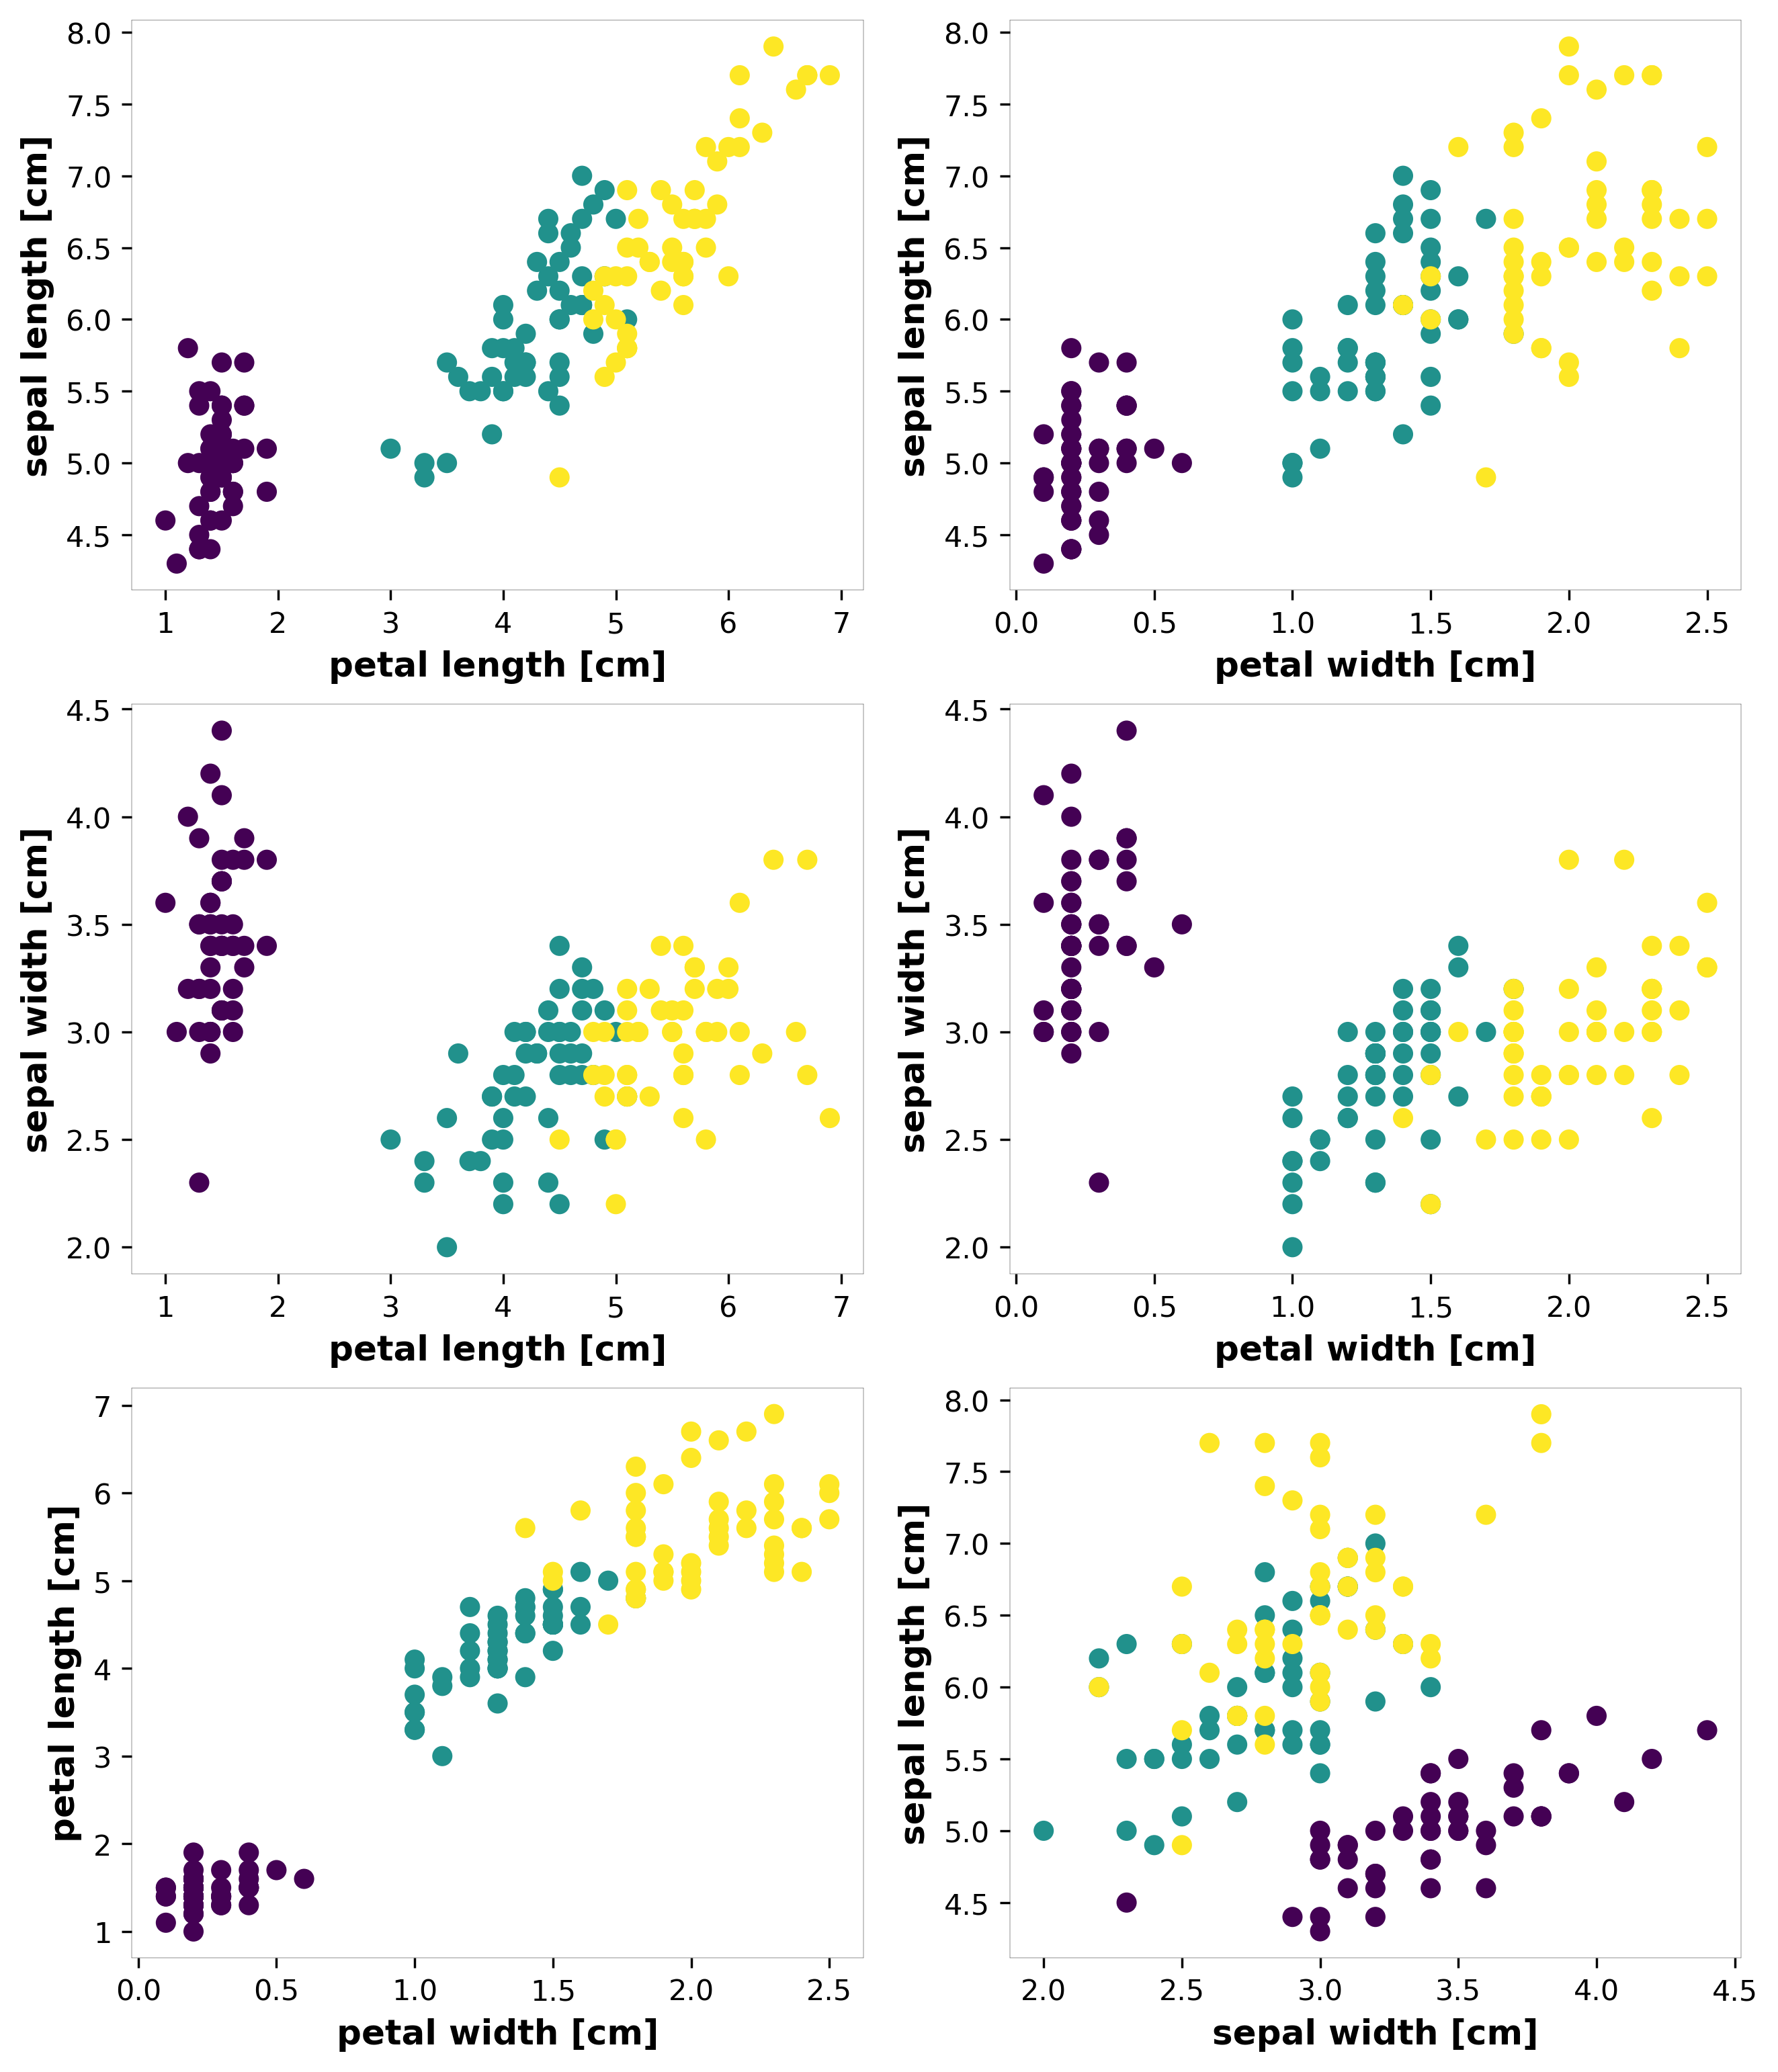

In [6]:
if draw_plot ==1:
    plt.subplot(3,2,1)
    plt.scatter(PL,SL,c=colors)
    plt.xlabel("petal length [cm]")
    plt.ylabel("sepal length [cm]")

    plt.subplot(3,2,2)
    plt.scatter(PW,SL,c=colors)
    plt.xlabel("petal width [cm]")
    plt.ylabel("sepal length [cm]")

    plt.subplot(3,2,3)
    plt.scatter(PL,SW,c=colors)
    plt.xlabel("petal length [cm]")
    plt.ylabel("sepal width [cm]")

    plt.subplot(3,2,4)
    plt.scatter(PW,SW,c=colors)
    plt.xlabel("petal width [cm]")
    plt.ylabel("sepal width [cm]")

    plt.subplot(3,2,5)
    plt.scatter(PW,PL,c=colors)
    plt.xlabel("petal width [cm]")
    plt.ylabel("petal length [cm]")

    plt.subplot(3,2,6)
    plt.scatter(SW,SL,c=colors)
    plt.xlabel("sepal width [cm]")
    plt.ylabel("sepal length [cm]")

    plt.show()

### Visualisation of the statistics

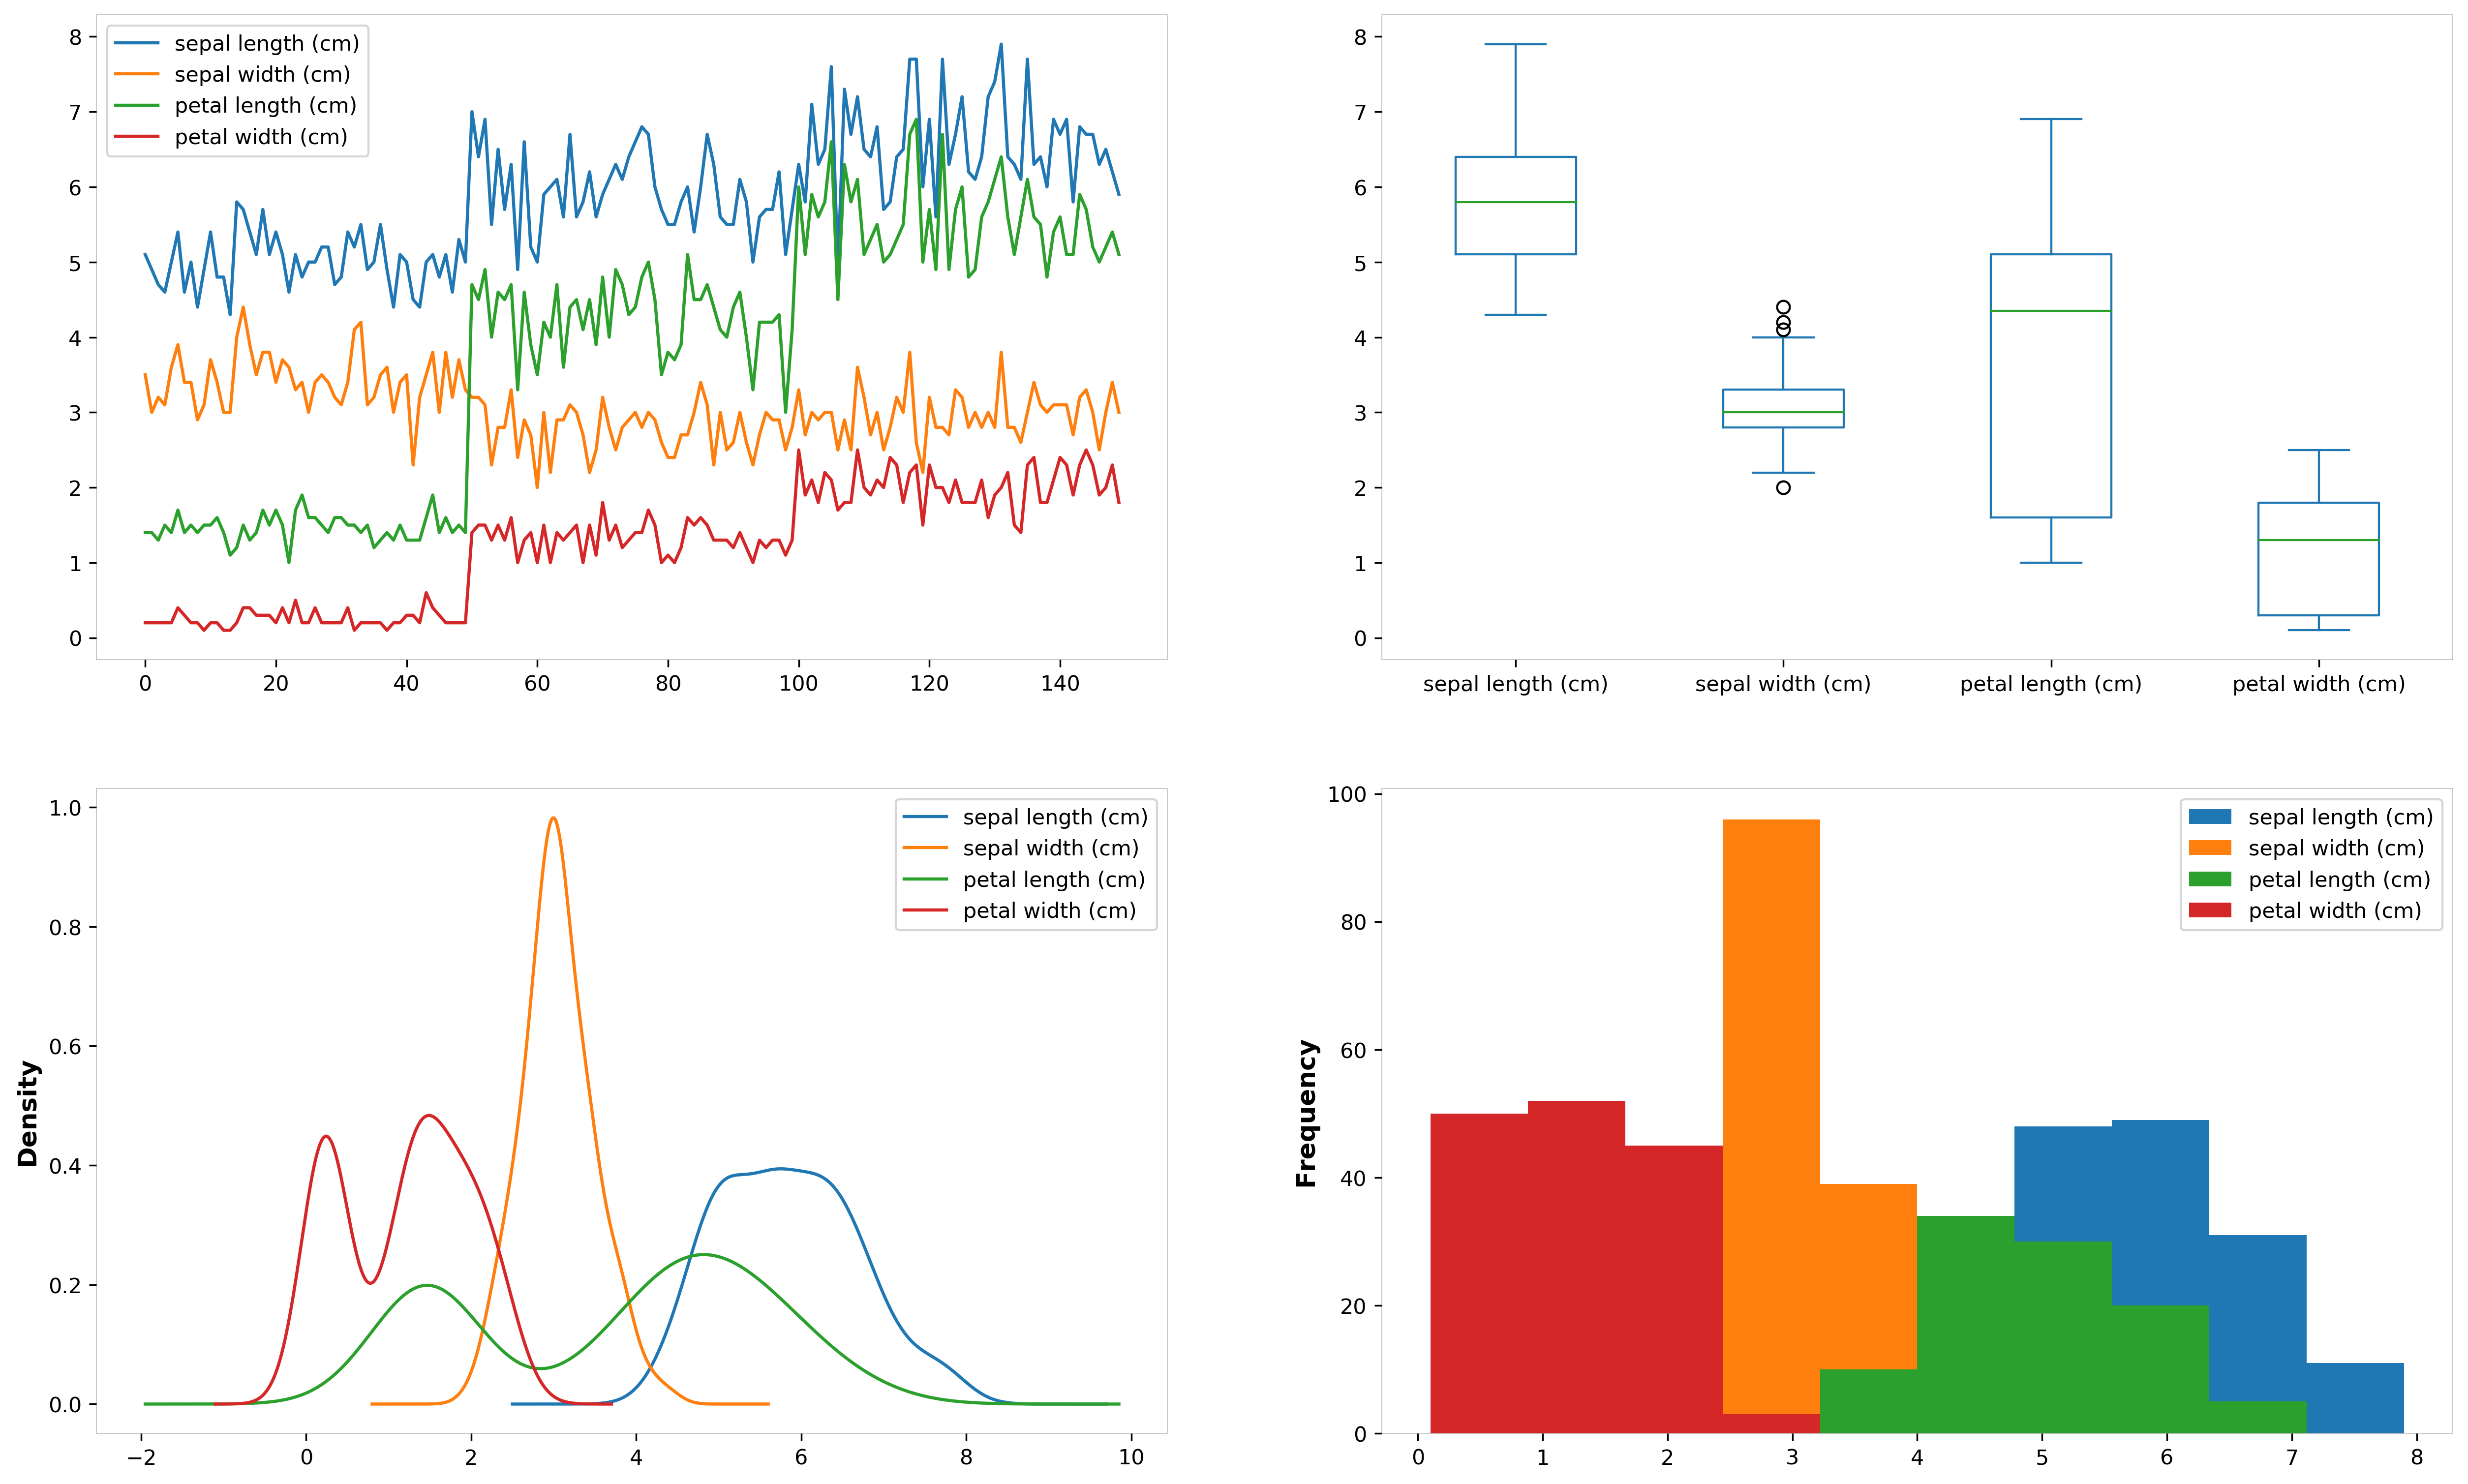

In [7]:
if draw_plot == 1:
    fig, axes = plt.subplots(nrows=2, ncols=2)

    fig.set_figheight(fig_height*2)
    fig.set_figwidth(fig_width*2)

    X.plot(kind='line',ax=axes[0,0])
    X.plot(kind='box',ax=axes[0,1])
    X.plot(kind='density',ax=axes[1,0])
    X.plot(kind='hist',ax=axes[1,1])
    plt.show()

## 3/ Data pre-processing
***

### Re-scaling the data
needed if we want to have a proper working algorithms.

In [8]:
scaler  = StandardScaler()
X       = scaler.fit_transform(X)
X       = pd.DataFrame(X)

### Visualisation of the changes in the statistics

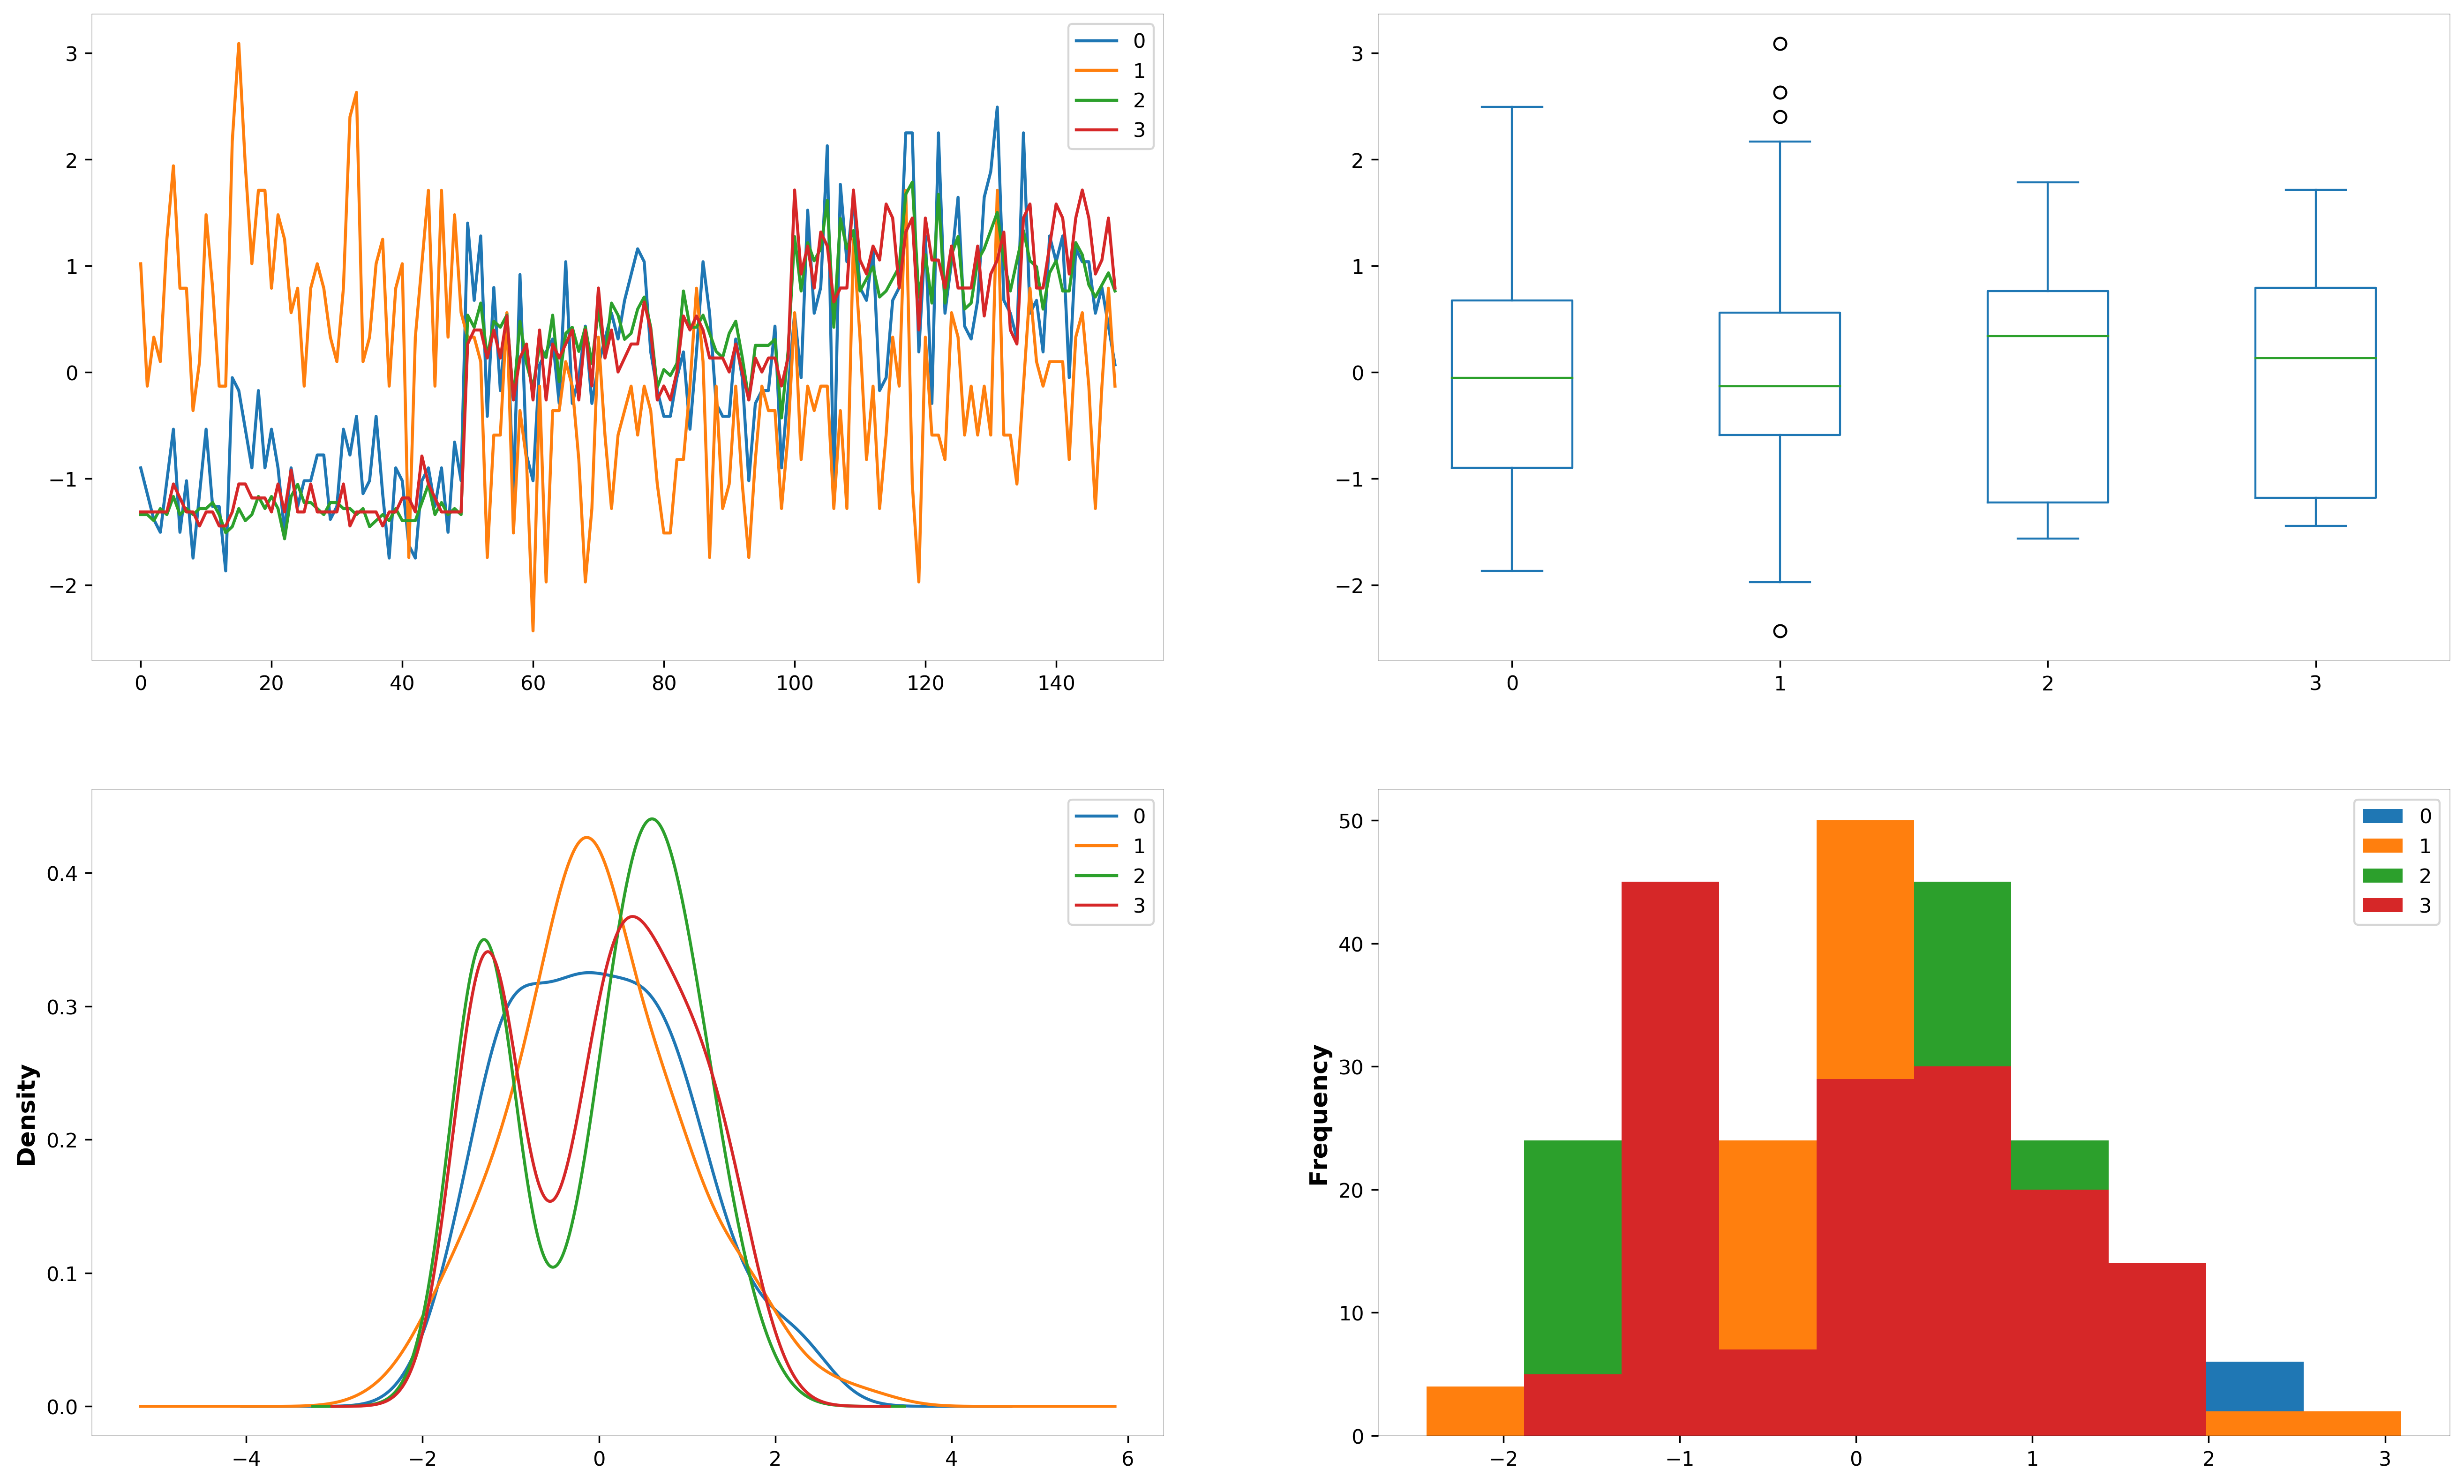

In [9]:
if draw_plot == 1:
    fig, axes = plt.subplots(nrows=2, ncols=2)

    fig.set_figheight(13)
    fig.set_figwidth(21)

    X.plot(kind='line',ax=axes[0,0])
    X.plot(kind='box',ax=axes[0,1])
    X.plot(kind='density',ax=axes[1,0])
    X.plot(kind='hist',ax=axes[1,1])

    plt.show()

### Splitting the datasets into train and test sub-datasets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)
y_test = np.array(y_test)

## 4/ Training
***

### a/ Support Vector Machine (SVM)

Specific packages

In [11]:
from sklearn import svm

Classifier definition

In [12]:
classifier_SVM = svm.SVC(kernel="linear")

Training

In [13]:
classifier_SVM.fit(X_train,y_train)

SVC(kernel='linear')

### b/ K-Nearest Neighbours (KNN)

Specific packages

In [14]:
from sklearn import neighbors

Classifier definition

In [15]:

classifier_KNN = neighbors.KNeighborsClassifier(n_neighbors=8)

Training

In [16]:
classifier_KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

### c/ Multi-Layers Perceptron (MLP)

Specific package

In [17]:
from sklearn.neural_network import MLPClassifier

Classifier definition

In [18]:
# the solver for weight optimization
#   "lbfgs" = low-memory Broyden Fletcher Goldfarb Shanno method
#   "activation" = the activation function of the neurons
#   "alpha" = the regularisation parameter
#   "hidden layer size" = (number of hidden layers, number of neurons per layer)
# 

classifier_MLP = MLPClassifier(
    solver              = "lbfgs",
    activation          = "relu",
    alpha               = 1e-5,
    hidden_layer_sizes  = (5,2),
)

Training

In [19]:
classifier_MLP.fit(X_train,y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), solver='lbfgs')

## 5/ Evaluation
***

### Predictions
using `predict` function

In [20]:
predictions_SVM     = classifier_SVM.predict(X_test)
predictions_KNN     = classifier_KNN.predict(X_test)
predictions_MLP     = classifier_MLP.predict(X_test)

### Confusion matrix
using the `plot_confusion_matrix` function

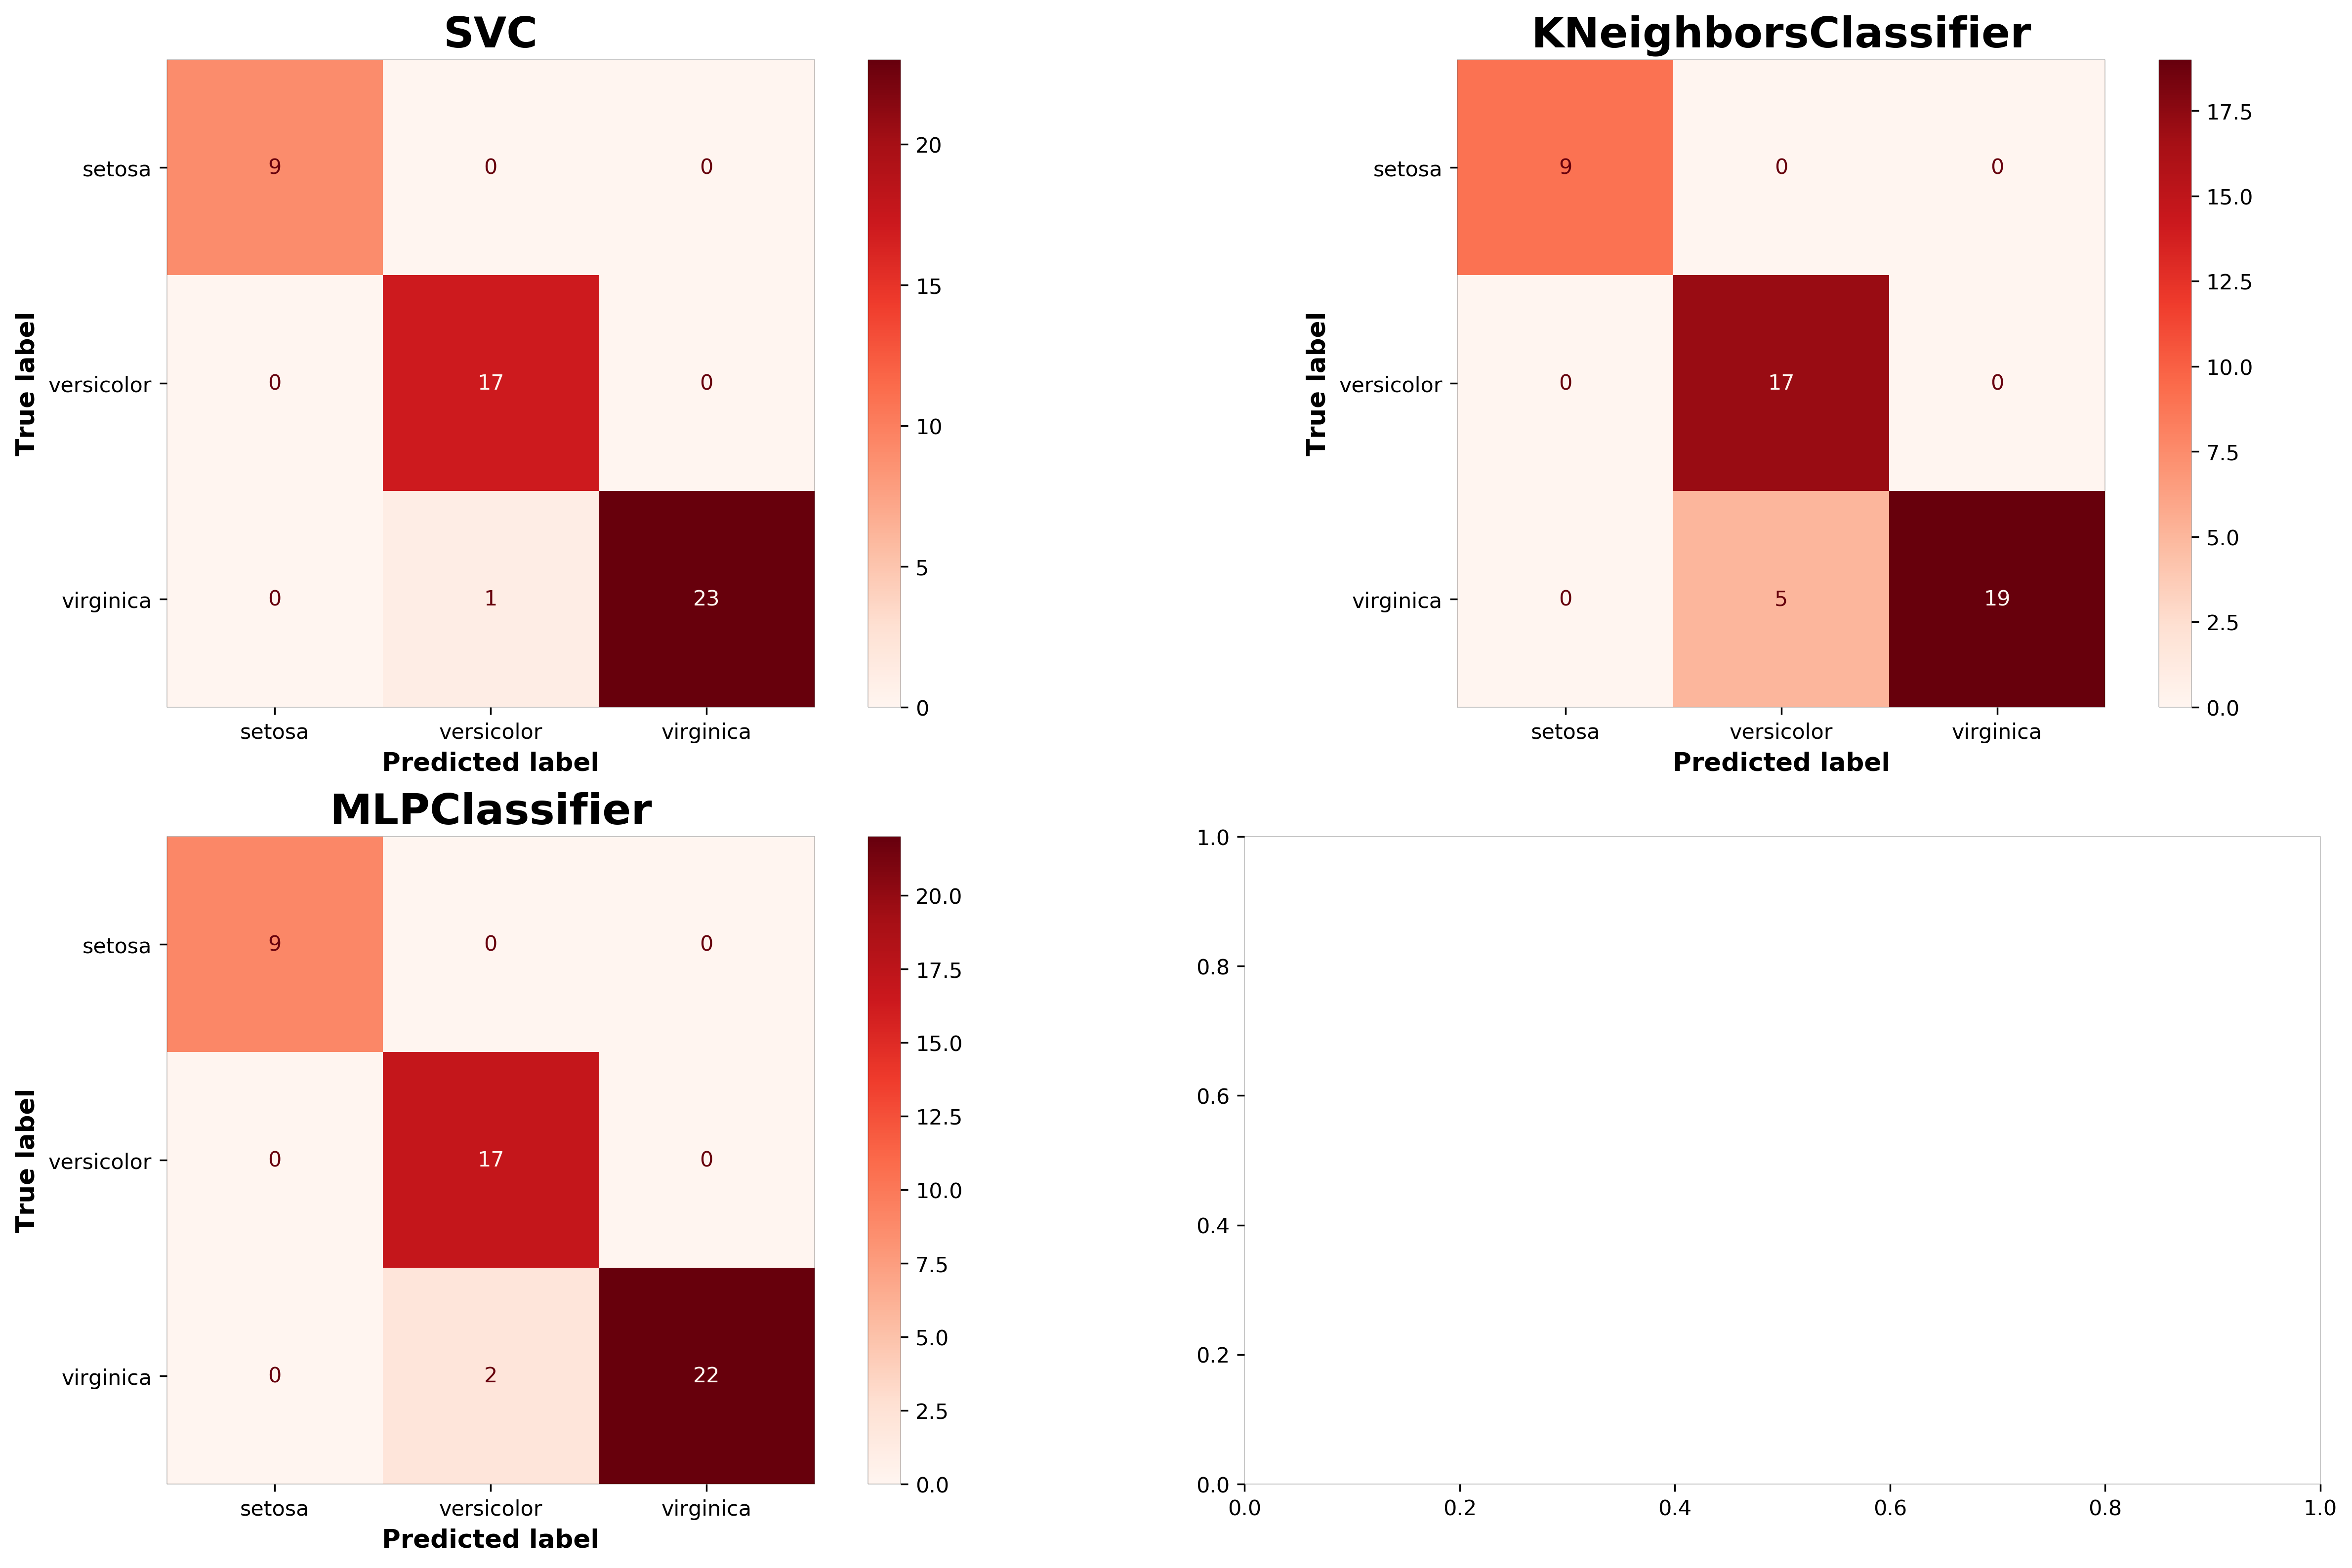

In [21]:
fig, axes   = plt.subplots(nrows=2, ncols=2, figsize=(fig_width*2,fig_height*2))
classifiers = [classifier_SVM,classifier_KNN,classifier_MLP]

for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(
                        cls, 
                        X_test, 
                        y_test, 
                        ax              = ax, 
                        cmap            = 'Reds',
                        display_labels  = class_names)
    ax.title.set_text(type(cls).__name__)
plt.show()

### Performance metrics
using the `accuracy`, `precision`, `recall` and `f1` functions

In [22]:
Acc_SVM = np.round(accuracy(y_test,predictions_SVM),3)
Acc_KNN = np.round(accuracy(y_test,predictions_KNN),3)
Acc_MLP = np.round(accuracy(y_test,predictions_MLP),3)

Pre_SVM = np.round(precision(y_test,predictions_SVM,average="macro"),3)
Pre_KNN = np.round(precision(y_test,predictions_KNN,average="macro"),3)
Pre_MLP = np.round(precision(y_test,predictions_MLP,average="macro"),3)


Rcl_SVM = np.round(recall(y_test,predictions_SVM,average="macro"),3)
Rcl_KNN = np.round(recall(y_test,predictions_KNN,average="macro"),3)
Rcl_MLP = np.round(recall(y_test,predictions_MLP,average="macro"),3)


F1_SVM  = np.round(f1(y_test,predictions_SVM,average="macro"),3)
F1_KNN  = np.round(f1(y_test,predictions_KNN,average="macro"),3)
F1_MLP  = np.round(f1(y_test,predictions_MLP,average="macro"),3)

Acc     = ["Accuracy",Acc_SVM,Acc_KNN,Acc_MLP]
Rcl     = ["Recall",Rcl_SVM,Rcl_KNN,Rcl_MLP]
Pre     = ["Precision",Pre_SVM,Pre_KNN,Pre_MLP]
F1      = ["F1",F1_SVM,F1_KNN,F1_MLP]


### Displaying results
using DataFrames

In [23]:
Metrics          = pd.DataFrame(np.zeros((3,4)))
Metrics.columns  = ["metric","SVM","KNN","MLP"]

Metrics.loc[0]   = Acc
Metrics.loc[1]   = Rcl
Metrics.loc[2]   = Pre
Metrics.loc[3]   = F1

Metrics

metric    SVM    KNN    MLP
0   Accuracy  0.980  0.900  0.960
1     Recall  0.986  0.931  0.972
2  Precision  0.981  0.924  0.965
3         F1  0.983  0.919  0.967

## 6/ Optimisation
***

In [24]:
from sklearn.metrics import make_scorer
scoring = {
    "Accuracy"  : make_scorer(accuracy),
    "Precision" : make_scorer(precision,average="macro"),
    "Recall"    : make_scorer(recall,average="macro"),
    "F1"        : make_scorer(f1,average="macro")
    }

### a/ SVM

In [25]:
gs_SVM = GridSearchCV(
    svm.SVC(),
    param_grid          = {"kernel":["linear","poly","rbf","sigmoid"]},
    scoring             = scoring,
    refit               = False,
    return_train_score  = True,
    cv                  = 5,
)

gs_SVM.fit(X_train,y_train)
results_SVM         = gs_SVM.cv_results_

kernels             = ["linear","poly","rbf","sigmoid"]
mean_fit_times      = np.round(results_SVM['mean_fit_time']*1e3,2)
std_fit_times       = np.round(results_SVM['std_fit_time']*1e3,2)
mean_score_times    = np.round(results_SVM['mean_score_time']*1e3,2)
std_score_times     = np.round(results_SVM['std_score_time']*1e3,2)
mean_test_accuracy  = np.round(results_SVM['mean_test_Accuracy'],2)
std_test_accuracy   = np.round(results_SVM['std_test_Accuracy'],2)
mean_test_precision = np.round(results_SVM['mean_test_Precision'],2)
std_test_precision  = np.round(results_SVM['std_test_Precision'],2)
mean_test_recall    = np.round(results_SVM['mean_test_Recall'],2)
std_test_recall     = np.round(results_SVM['std_test_Recall'],2)
mean_test_f1        = np.round(results_SVM['mean_test_F1'],2)
std_test_f1         = np.round(results_SVM['std_test_F1'],2)

metrics_SVM         = np.zeros((4,13))
metrics_SVM[:,1]    = mean_fit_times
metrics_SVM[:,2]    = std_fit_times
metrics_SVM[:,3]    = mean_score_times
metrics_SVM[:,4]    = std_score_times
metrics_SVM[:,5]    = mean_test_accuracy
metrics_SVM[:,6]    = std_test_accuracy
metrics_SVM[:,7]    = mean_test_precision
metrics_SVM[:,8]    = std_test_precision
metrics_SVM[:,9]    = mean_test_accuracy
metrics_SVM[:,10]   = std_test_accuracy
metrics_SVM[:,11]   = mean_test_precision
metrics_SVM[:,12]   = std_test_precision
metrics_SVM         = pd.DataFrame(metrics_SVM)
metrics_SVM.columns = [
    "kernel",
    "mean fit times [ms]",
    "std fit times [ms]",
    "mean score times [ms]",
    "std score times [ms]",
    "mean accuracy",
    "std accuracy",
    "mean precision",
    "std precision",
    "mean recall",
    "std recall",
    "mean F1",
    "std F1",
    ]
metrics_SVM["kernel"]=kernels
metrics_SVM

kernel  mean fit times [ms]  std fit times [ms]  mean score times [ms]  \
0   linear                 2.17                0.91                   3.38   
1     poly                 1.80                0.17                   3.41   
2      rbf                 1.96                0.26                   3.26   
3  sigmoid                 1.57                0.15                   2.85   

   std score times [ms]  mean accuracy  std accuracy  mean precision  \
0                  0.35           0.99          0.02            0.99   
1                  0.28           0.89          0.07            0.90   
2                  0.12           0.95          0.03            0.96   
3                  0.26           0.91          0.04            0.92   

   std precision  mean recall  std recall  mean F1  std F1  
0           0.02         0.99        0.02     0.99    0.02  
1           0.07         0.89        0.07     0.90    0.07  
2           0.02         0.95        0.03     0.96    0.02  
3           0.03         0.91        0.04     0.92    0.03

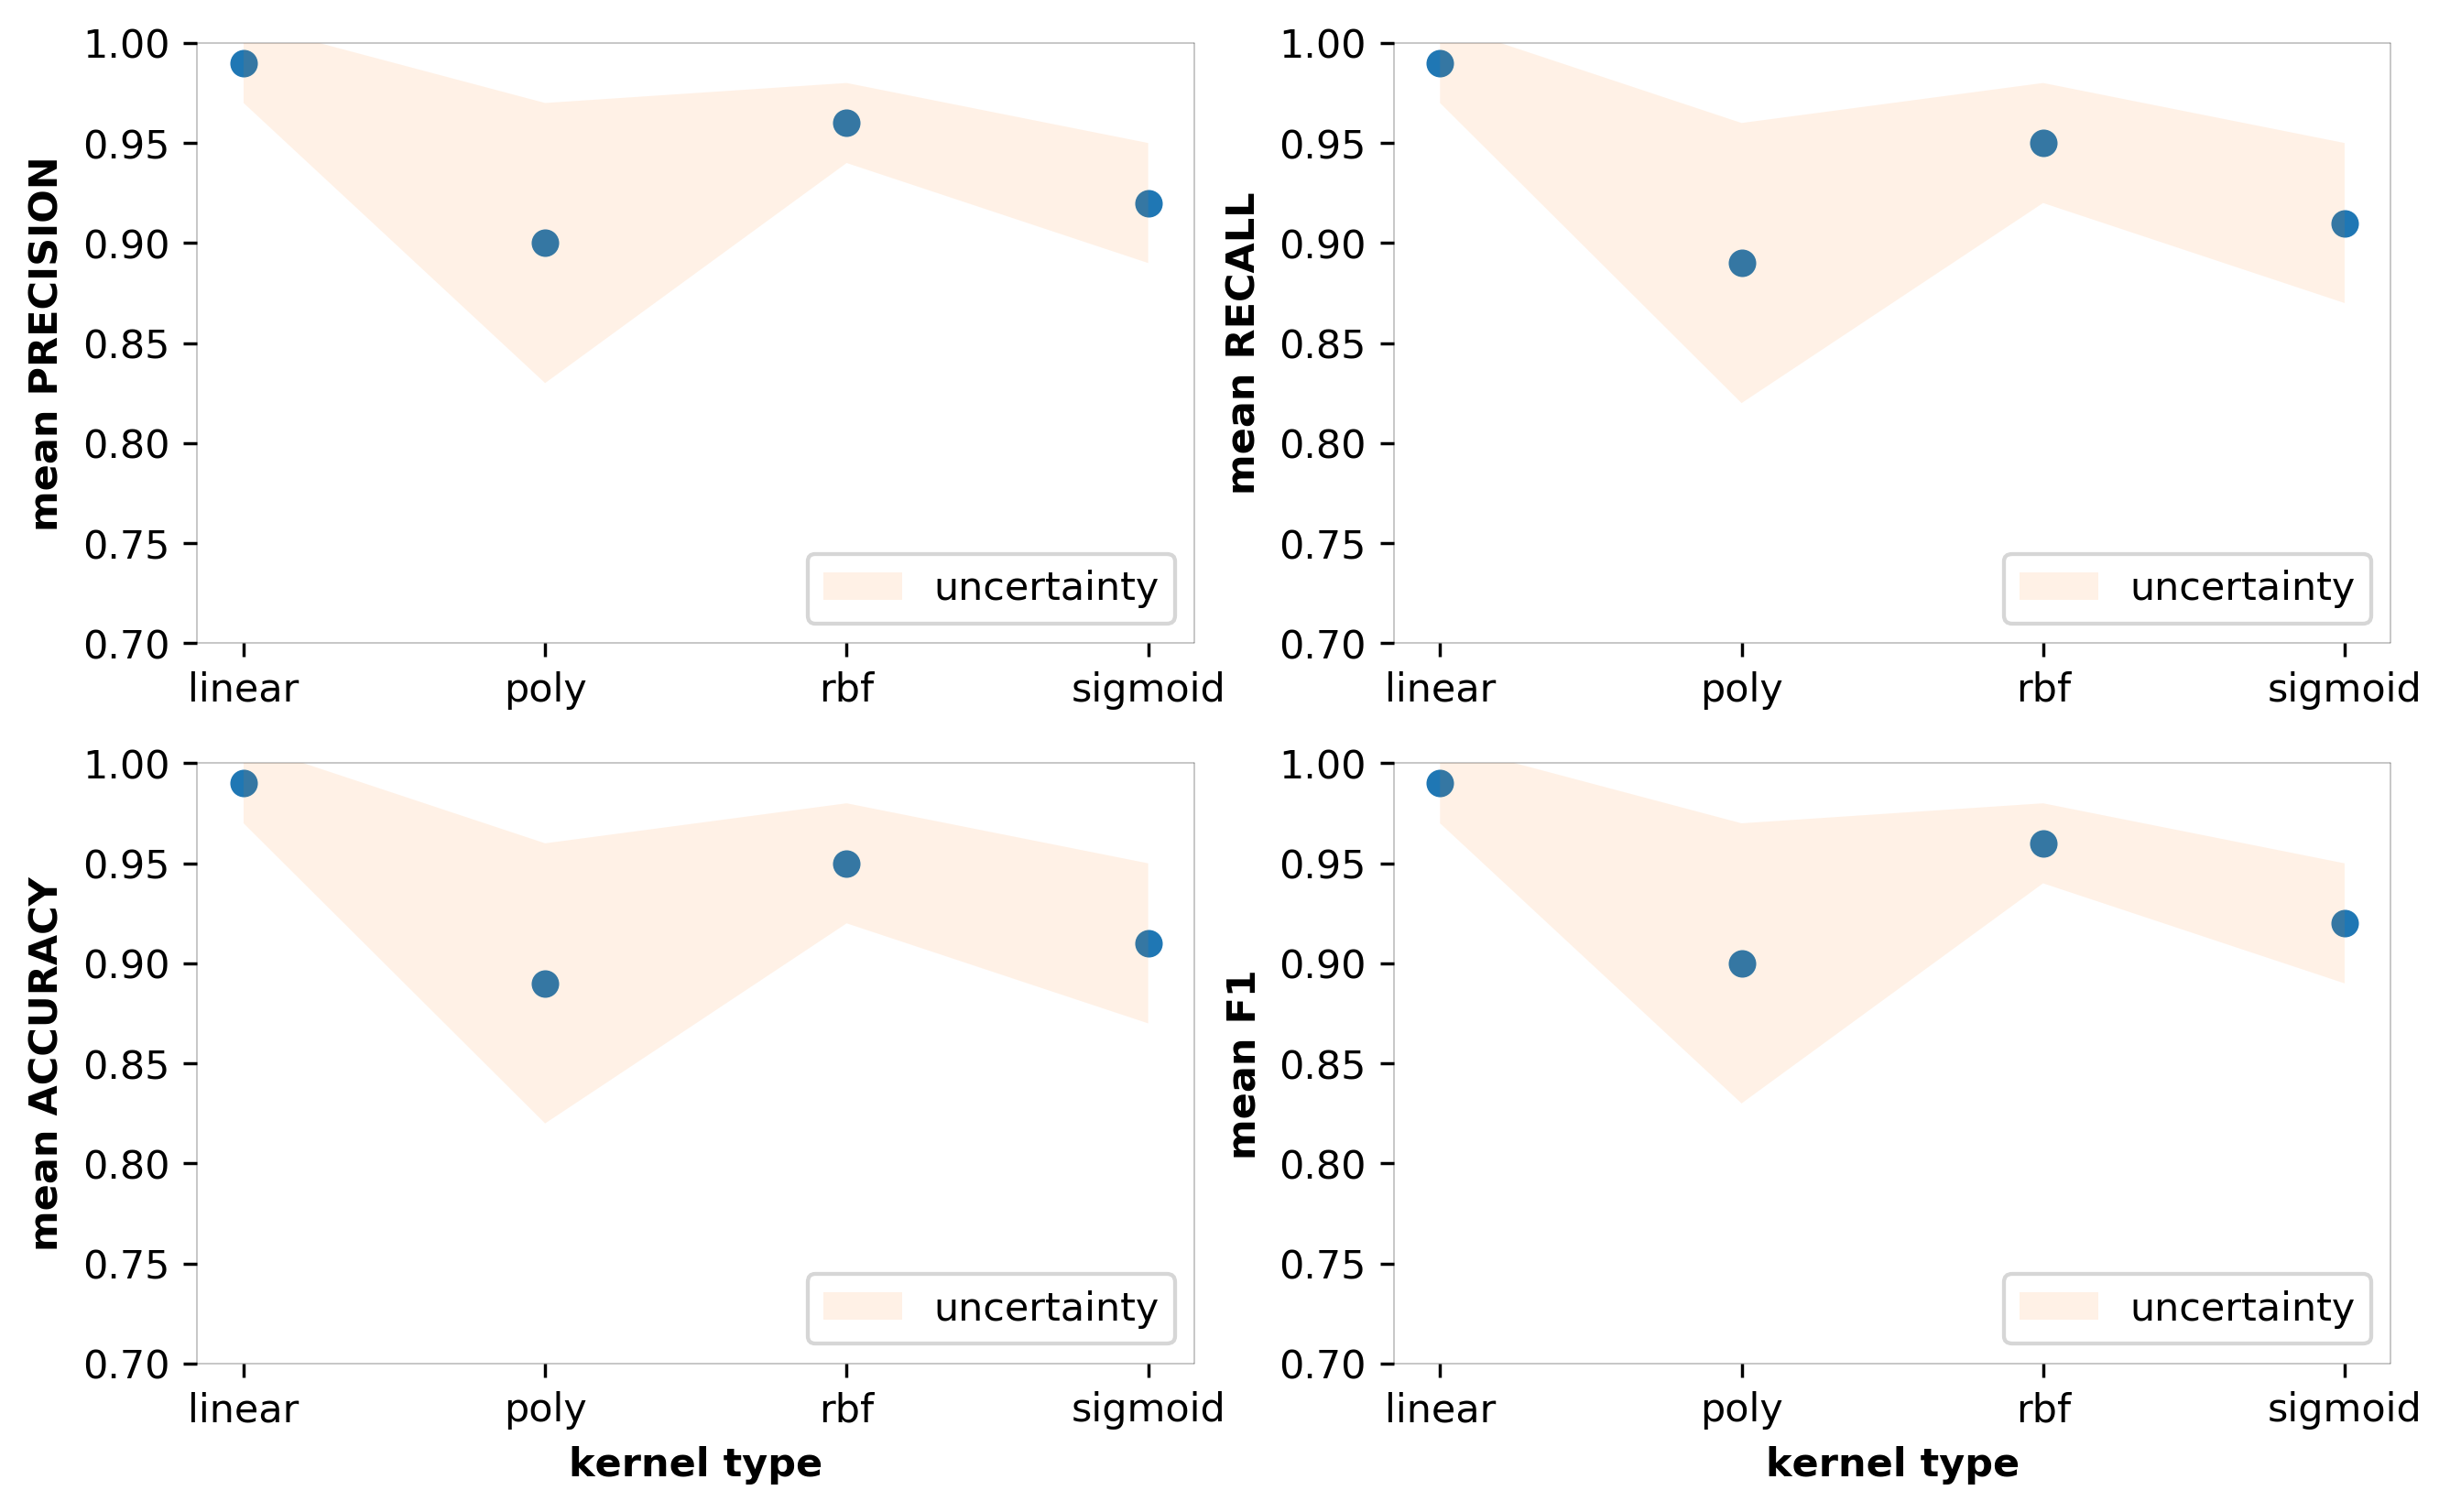

In [26]:
plt.rcParams['figure.figsize']  = (fig_width, fig_height)
plt.rcParams['figure.dpi']      = fig_resolution*5
plt.rcParams["axes.titlesize"]  = "12"
plt.rcParams["axes.labelsize"]  = "10"

xx      = [0,1,2,3]
ylim    = [0.7,1]

plt.subplot(2,2,1)
plt.scatter(metrics_SVM["kernel"], metrics_SVM["mean precision"])
plt.ylabel('mean PRECISION')
plt.gca().fill_between(
    xx,
    metrics_SVM["mean precision"]-metrics_SVM["std precision"],
    metrics_SVM["mean precision"]+metrics_SVM["std precision"],
    alpha = 0.1,
    label = "uncertainty")
plt.xticks(xx,kernels)
plt.ylim(ylim)
plt.legend(loc="lower right")

plt.subplot(2,2,2)
plt.scatter(metrics_SVM["kernel"], metrics_SVM["mean recall"])
plt.ylabel('mean RECALL')
plt.gca().fill_between(
    xx,
    metrics_SVM["mean recall"]-metrics_SVM["std recall"],
    metrics_SVM["mean recall"]+metrics_SVM["std recall"],
    alpha = 0.1,
    label = "uncertainty")
plt.xticks(xx,kernels)
plt.ylim(ylim)
plt.legend(loc="lower right")

plt.subplot(2,2,3)
plt.scatter(metrics_SVM["kernel"], metrics_SVM["mean accuracy"])
plt.xlabel('kernel type')
plt.ylabel('mean ACCURACY')
plt.gca().fill_between(
    xx,
    metrics_SVM["mean accuracy"]-metrics_SVM["std accuracy"],
    metrics_SVM["mean accuracy"]+metrics_SVM["std accuracy"],
    alpha = 0.1,
    label = "uncertainty")
plt.xticks(xx,kernels)
plt.ylim(ylim)
plt.legend(loc="lower right")

plt.subplot(2,2,4)
plt.scatter(metrics_SVM["kernel"], metrics_SVM["mean F1"])
plt.xlabel('kernel type')
plt.ylabel('mean F1')
plt.gca().fill_between(
    xx,
    metrics_SVM["mean F1"]-metrics_SVM["std F1"],
    metrics_SVM["mean F1"]+metrics_SVM["std F1"],
    alpha = 0.1,
    label = "uncertainty")
plt.xticks(xx,kernels)
plt.ylim(ylim)
plt.legend(loc="lower right")

plt.show()

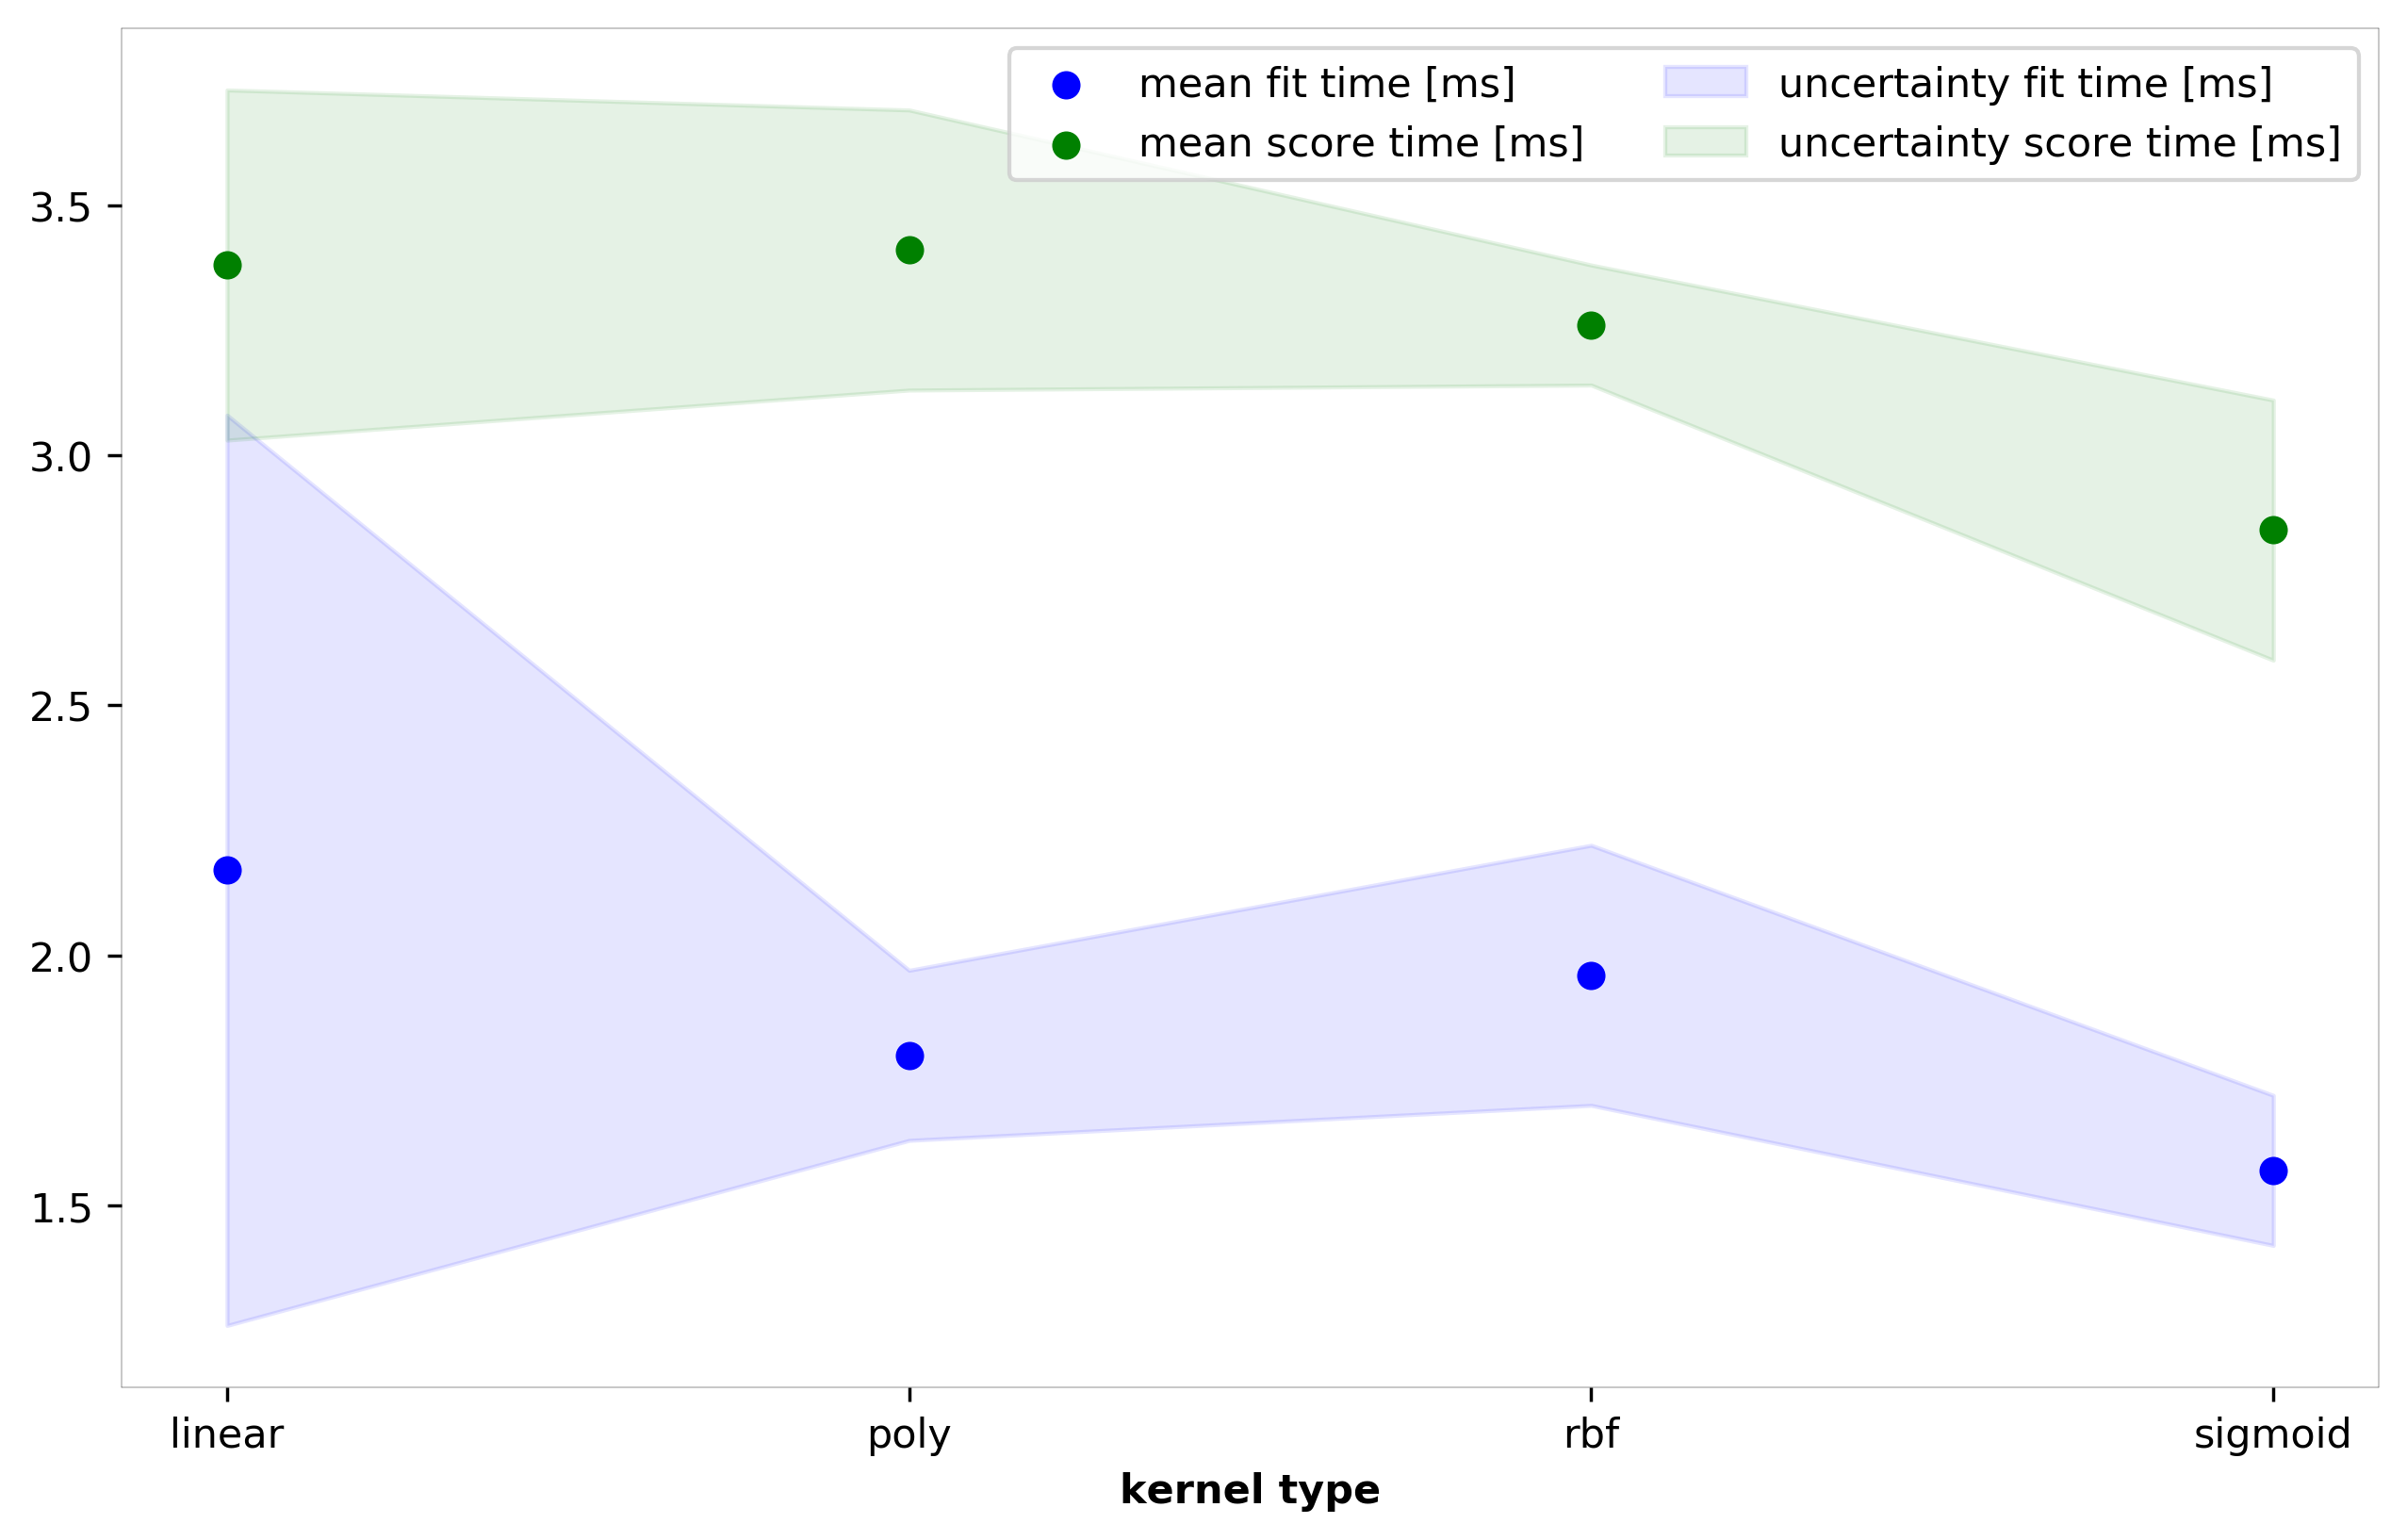

In [29]:
plt.scatter(metrics_SVM["kernel"], metrics_SVM["mean fit times [ms]"],color="blue",label="mean fit time [ms]")
plt.scatter(metrics_SVM["kernel"], metrics_SVM["mean score times [ms]"],color="green",label="mean score time [ms]")
plt.xlabel('kernel type')
plt.gca().fill_between(
    xx,
    metrics_SVM["mean fit times [ms]"]-metrics_SVM["std fit times [ms]"],
    metrics_SVM["mean fit times [ms]"]+metrics_SVM["std fit times [ms]"],
    color = "blue",
    alpha = 0.1,
    label = "uncertainty fit time [ms]")

plt.gca().fill_between(
    xx,
    metrics_SVM["mean score times [ms]"]-metrics_SVM["std score times [ms]"],
    metrics_SVM["mean score times [ms]"]+metrics_SVM["std score times [ms]"],
    color = "green",
    alpha = 0.1,
    label = "uncertainty score time [ms]")
plt.legend(ncol=2)
plt.xticks(xx,kernels)
plt.show()

### b/ K-NN

In [33]:
gs_KNN = GridSearchCV(
    neighbors.KNeighborsClassifier(),
    param_grid          = {"n_neighbors":[2,3,4,5,6,7,8,9,10,11,12,13,14,15]},
    scoring             = scoring,
    refit               = False,
    return_train_score  = True,
    cv                  = 5,
)

gs_KNN.fit(X_train,y_train)
results_KNN         = gs_KNN.cv_results_

neighbours          = [results_KNN['params'][k]["n_neighbors"] for k in range(14)]
mean_fit_times      = np.round(results_KNN['mean_fit_time']*1e3,2)
std_fit_times       = np.round(results_KNN['std_fit_time']*1e3,2)
mean_score_times    = np.round(results_KNN['mean_score_time']*1e3,2)
std_score_times     = np.round(results_KNN['std_score_time']*1e3,2)
mean_test_accuracy  = np.round(results_KNN['mean_test_Accuracy'],2)
std_test_accuracy   = np.round(results_KNN['std_test_Accuracy'],2)
mean_test_precision = np.round(results_KNN['mean_test_Precision'],2)
std_test_precision  = np.round(results_KNN['std_test_Precision'],2)
mean_test_recall    = np.round(results_KNN['mean_test_Recall'],2)
std_test_recall     = np.round(results_KNN['std_test_Recall'],2)
mean_test_f1        = np.round(results_KNN['mean_test_F1'],2)
std_test_f1         = np.round(results_KNN['std_test_F1'],2)

metrics_KNN         = np.zeros((14,13))
metrics_KNN[:,0]    = neighbours
metrics_KNN[:,1]    = mean_fit_times
metrics_KNN[:,2]    = std_fit_times
metrics_KNN[:,3]    = mean_score_times
metrics_KNN[:,4]    = std_score_times
metrics_KNN[:,5]    = mean_test_accuracy
metrics_KNN[:,6]    = std_test_accuracy
metrics_KNN[:,7]    = mean_test_precision
metrics_KNN[:,8]    = std_test_precision
metrics_KNN[:,9]    = mean_test_accuracy
metrics_KNN[:,10]   = std_test_accuracy
metrics_KNN[:,11]   = mean_test_precision
metrics_KNN[:,12]   = std_test_precision
metrics_KNN         = pd.DataFrame(metrics_KNN)
metrics_KNN.columns = [
    "neighbours",
    "mean fit times [ms]",
    "std fit times [ms]",
    "mean score times [ms]",
    "std score times [ms]",
    "mean accuracy",
    "std accuracy",
    "mean precision",
    "std precision",
    "mean recall",
    "std recall",
    "mean F1",
    "std F1",
    ]
metrics_KNN

neighbours  mean fit times [ms]  std fit times [ms]  \
0          2.0                 2.07                0.31   
1          3.0                 1.70                0.08   
2          4.0                 1.63                0.10   
3          5.0                 1.54                0.07   
4          6.0                 1.70                0.19   
5          7.0                 1.59                0.07   
6          8.0                 1.35                0.09   
7          9.0                 1.26                0.06   
8         10.0                 1.16                0.01   
9         11.0                 1.23                0.05   
10        12.0                 1.23                0.08   
11        13.0                 1.21                0.05   
12        14.0                 1.23                0.07   
13        15.0                 1.18                0.03   

    mean score times [ms]  std score times [ms]  mean accuracy  std accuracy  \
0                    5.16                  0.65           0.91          0.04   
1                    4.32                  0.22           0.92          0.02   
2                    4.13                  0.17           0.93          0.02   
3                    3.93                  0.16           0.95          0.03   
4                    4.39                  0.32           0.95          0.03   
5                    4.00                  0.05           0.95          0.03   
6                    3.63                  0.25           0.94          0.02   
7                    3.27                  0.21           0.95          0.03   
8                    3.18                  0.16           0.94          0.04   
9                    3.20                  0.10           0.95          0.03   
10                   3.25                  0.18           0.92          0.05   
11                   3.38                  0.31           0.95          0.03   
12                   3.17                  0.06           0.93          0.05   
13                   3.21                  0.16           0.93          0.05   

    mean precision  std precision  mean recall  std recall  mean F1  std F1  
0             0.92           0.05         0.91        0.04     0.92    0.05  
1             0.92           0.03         0.92        0.02     0.92    0.03  
2             0.94           0.02         0.93        0.02     0.94    0.02  
3             0.96           0.02         0.95        0.03     0.96    0.02  
4             0.96           0.02         0.95        0.03     0.96    0.02  
5             0.95           0.04         0.95        0.03     0.95    0.04  
6             0.94           0.03         0.94        0.02     0.94    0.03  
7             0.95           0.04         0.95        0.03     0.95    0.04  
8             0.94           0.05         0.94        0.04     0.94    0.05  
9             0.95           0.04         0.95        0.03     0.95    0.04  
10            0.93           0.04         0.92        0.05     0.93    0.04  
11            0.96           0.02         0.95        0.03     0.96    0.02  
12            0.94           0.04         0.93        0.05     0.94    0.04  
13            0.94           0.04         0.93        0.05     0.94    0.04

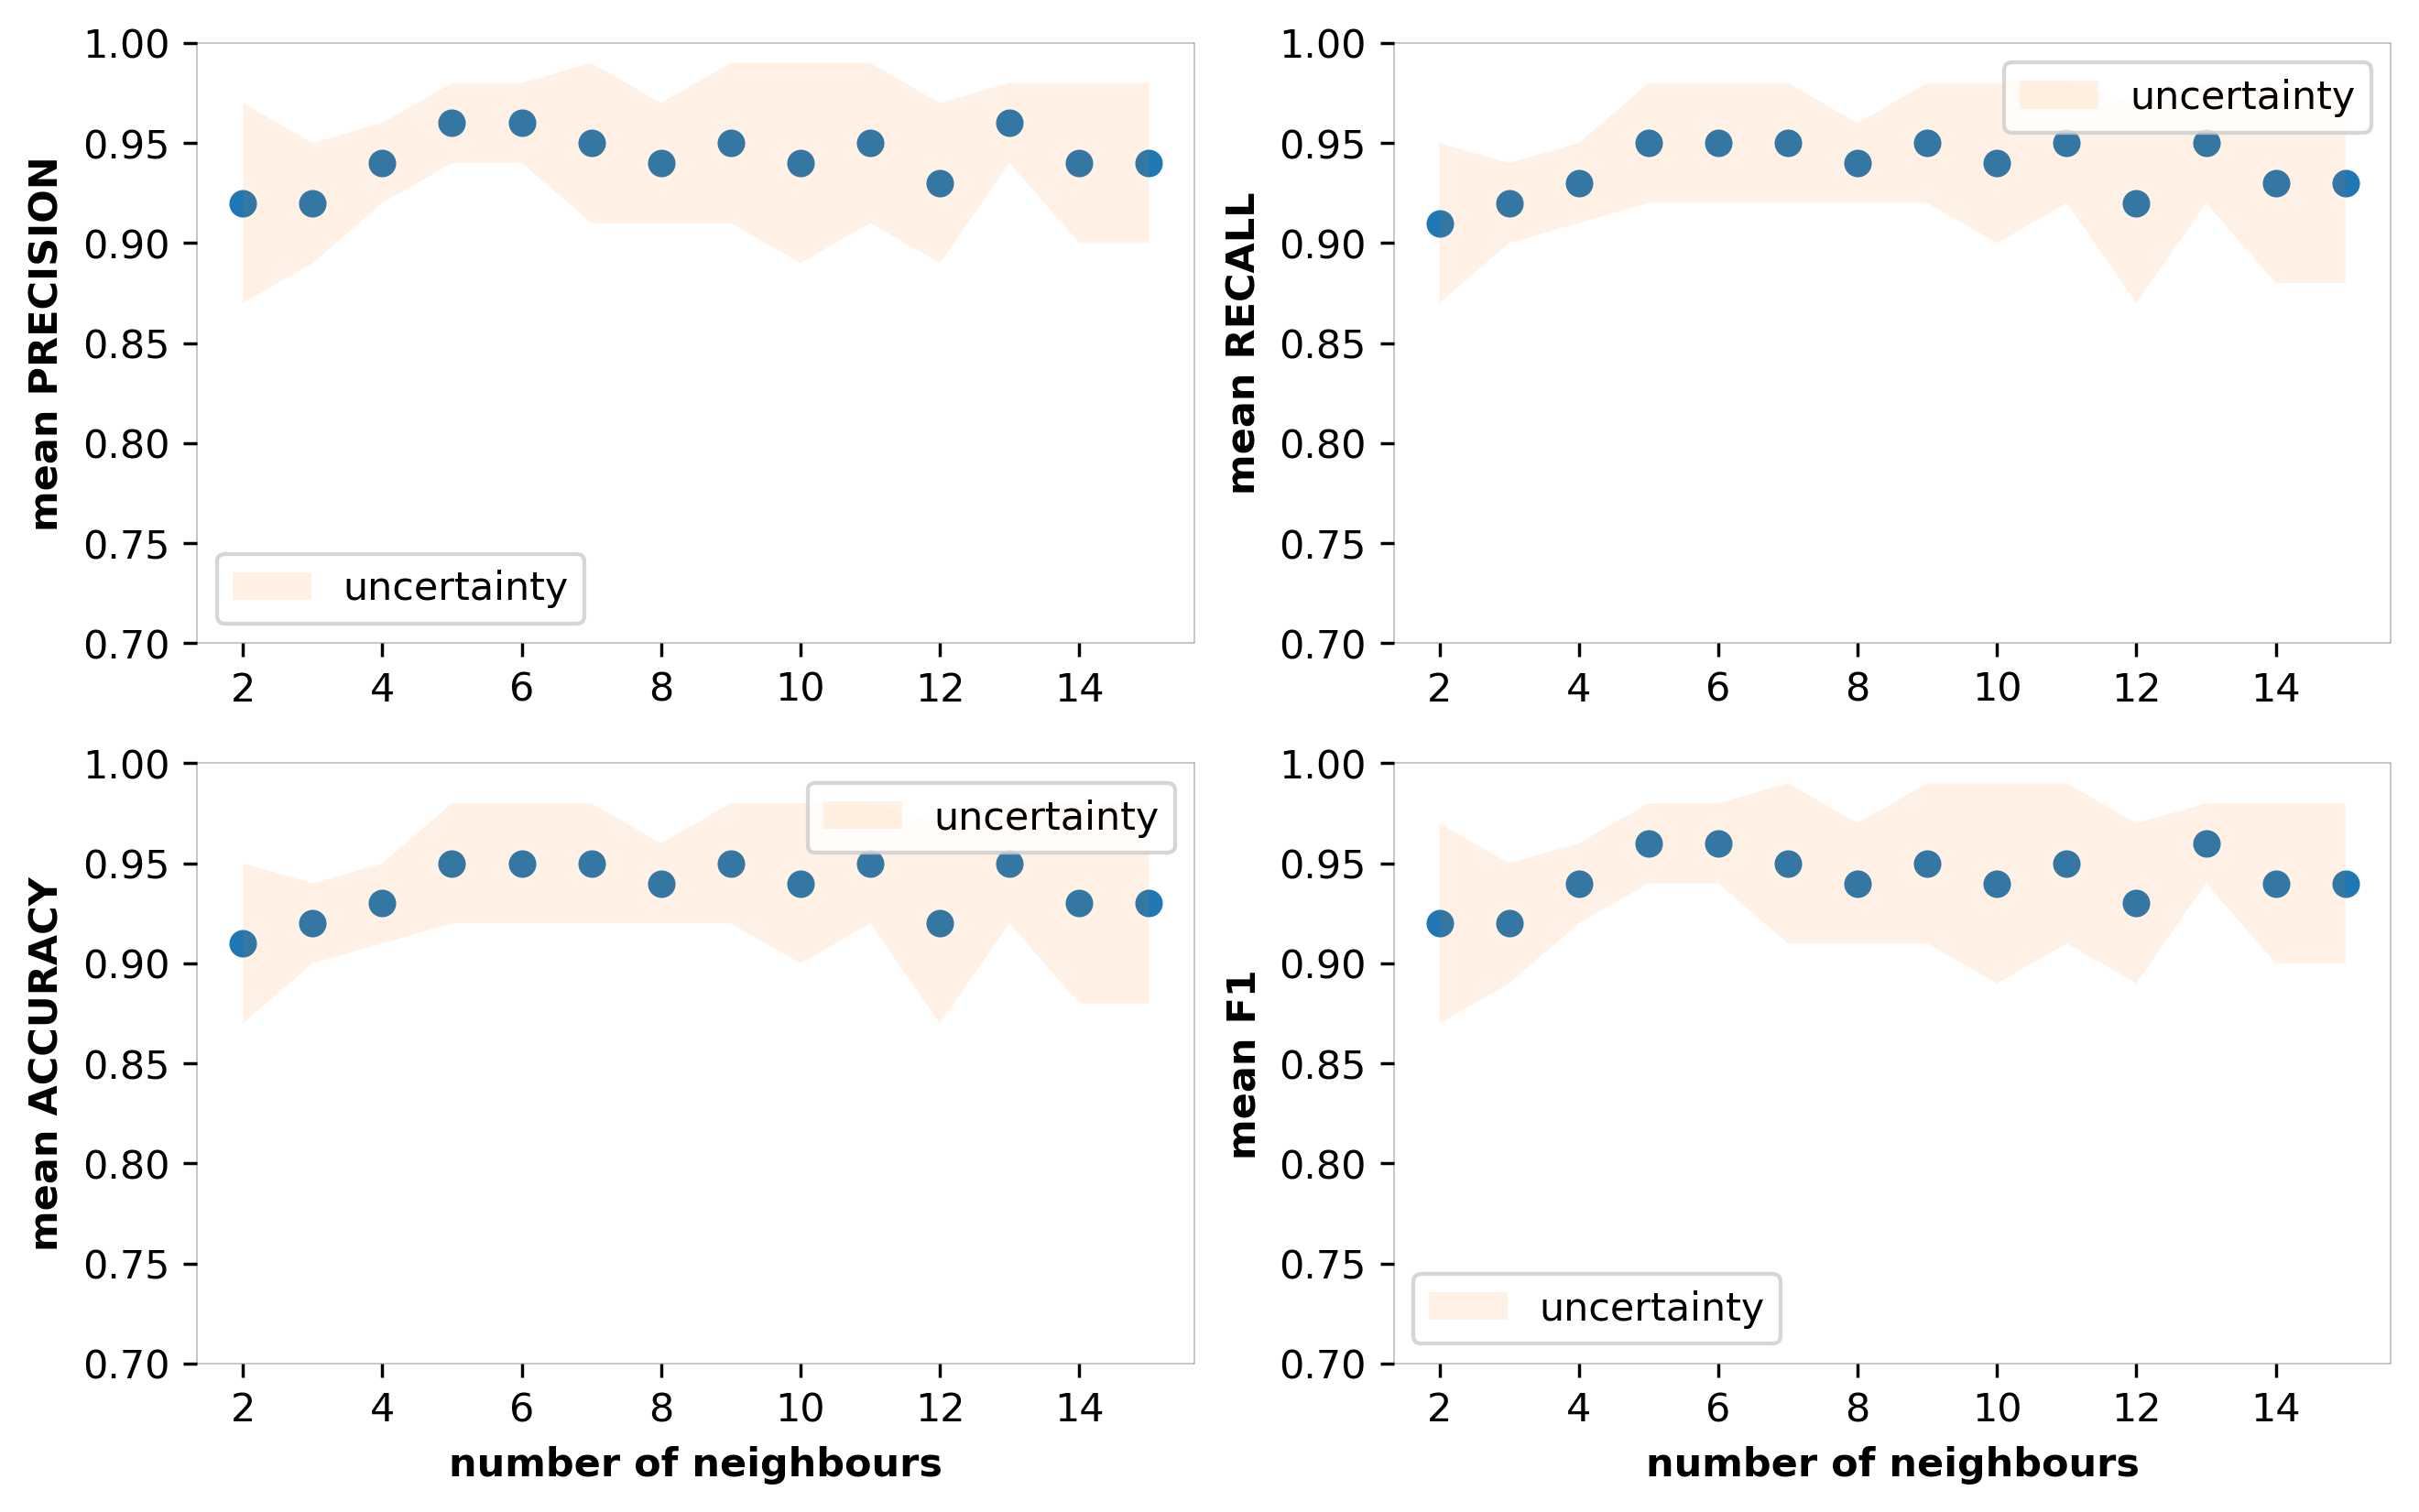

In [34]:
plt.rcParams['figure.figsize']  = (fig_width, fig_height)
plt.rcParams['figure.dpi']      = fig_resolution*5
plt.rcParams["axes.titlesize"]  = "12"
plt.rcParams["axes.labelsize"]  = "10"

ylim = [0.7,1]

plt.subplot(2,2,1)
plt.scatter(metrics_KNN["neighbours"], metrics_KNN["mean precision"])
plt.ylabel('mean PRECISION')
plt.gca().fill_between(
    np.linspace(2,15,14),
    metrics_KNN["mean precision"]-metrics_KNN["std precision"],
    metrics_KNN["mean precision"]+metrics_KNN["std precision"],
    alpha = 0.1,
    label = "uncertainty")
plt.ylim(ylim)
plt.legend()

plt.subplot(2,2,2)
plt.scatter(metrics_KNN["neighbours"], metrics_KNN["mean recall"])
plt.ylabel('mean RECALL')
plt.gca().fill_between(
    np.linspace(2,15,14),
    metrics_KNN["mean recall"]-metrics_KNN["std recall"],
    metrics_KNN["mean recall"]+metrics_KNN["std recall"],
    alpha = 0.1,
    label = "uncertainty")
plt.ylim(ylim)
plt.legend()

plt.subplot(2,2,3)
plt.scatter(metrics_KNN["neighbours"], metrics_KNN["mean accuracy"])
plt.xlabel('number of neighbours')
plt.ylabel('mean ACCURACY')
plt.gca().fill_between(
    np.linspace(2,15,14),
    metrics_KNN["mean accuracy"]-metrics_KNN["std accuracy"],
    metrics_KNN["mean accuracy"]+metrics_KNN["std accuracy"],
    alpha = 0.1,
    label = "uncertainty")
plt.ylim(ylim)
plt.legend()

plt.subplot(2,2,4)
plt.scatter(metrics_KNN["neighbours"], metrics_KNN["mean F1"])
plt.xlabel('number of neighbours')
plt.ylabel('mean F1')
plt.gca().fill_between(
    np.linspace(2,15,14),
    metrics_KNN["mean F1"]-metrics_KNN["std F1"],
    metrics_KNN["mean F1"]+metrics_KNN["std F1"],
    alpha = 0.1,
    label = "uncertainty")
plt.ylim(ylim)
plt.legend()

plt.show()


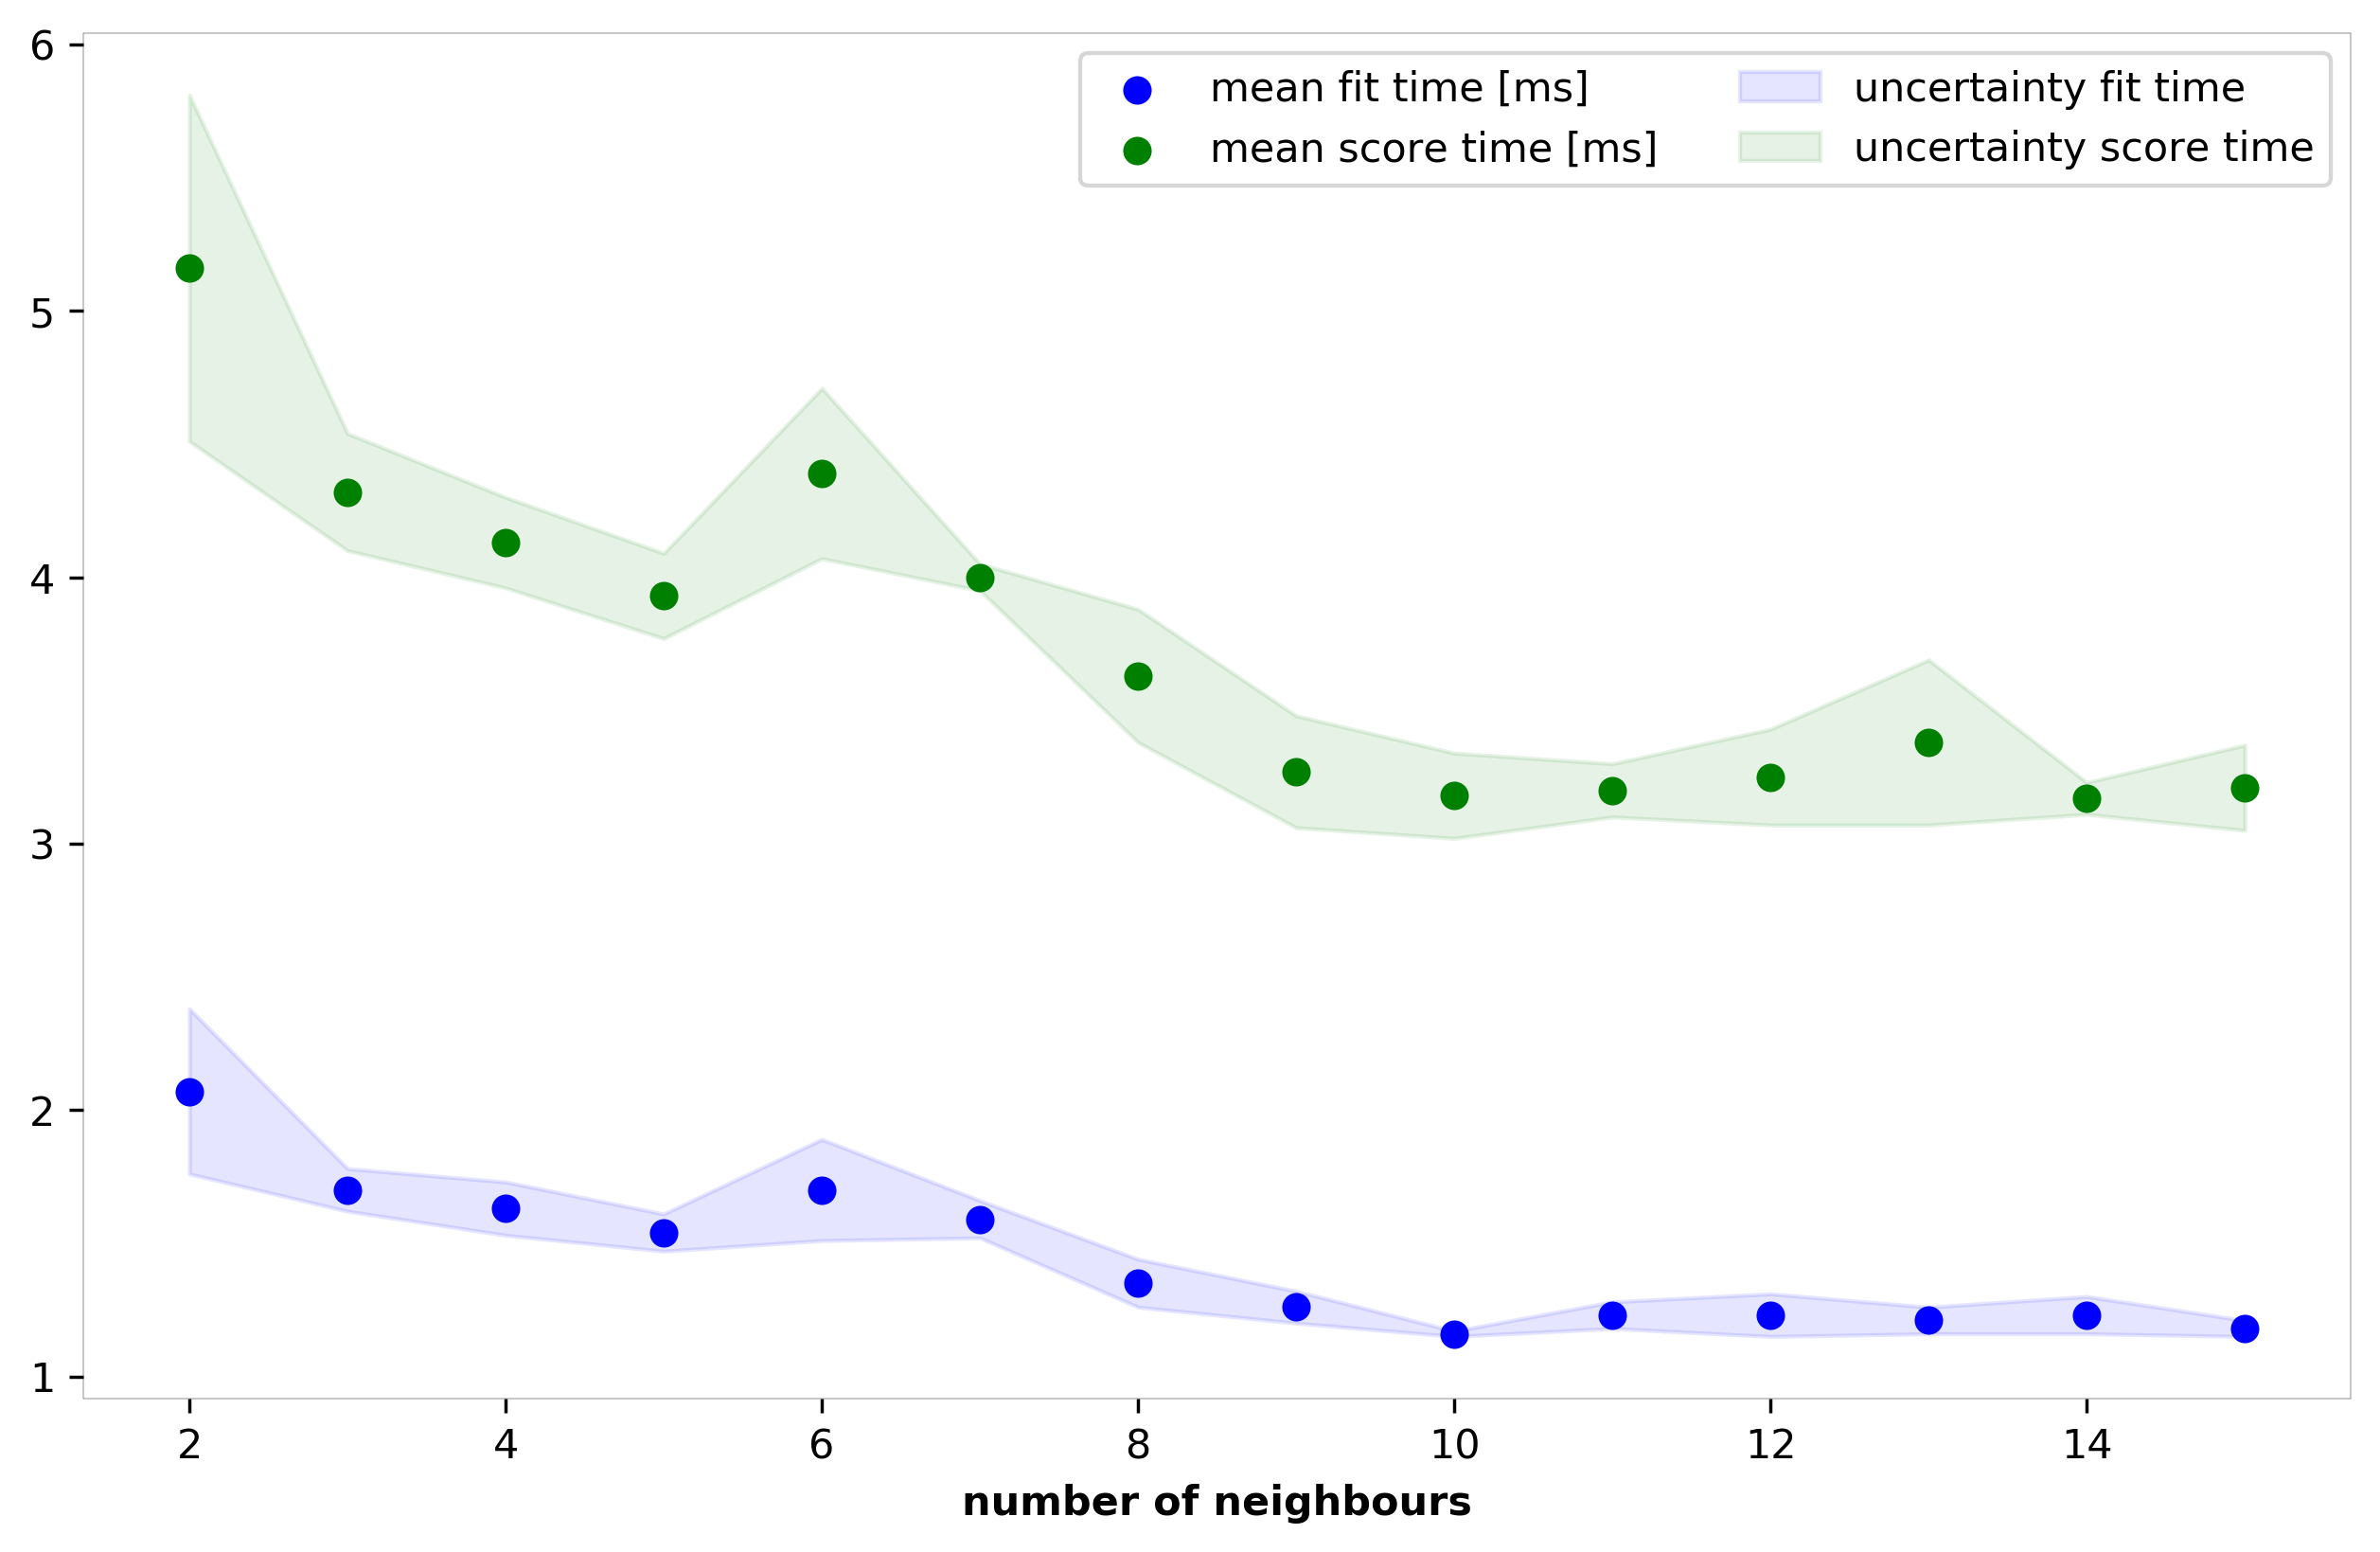

In [35]:
plt.scatter(metrics_KNN["neighbours"], metrics_KNN["mean fit times [ms]"],color="blue",label="mean fit time [ms]")
plt.scatter(metrics_KNN["neighbours"], metrics_KNN["mean score times [ms]"],color="green",label="mean score time [ms]")
plt.xlabel('number of neighbours')
plt.gca().fill_between(
    np.linspace(2,15,14),
    metrics_KNN["mean fit times [ms]"]-metrics_KNN["std fit times [ms]"],
    metrics_KNN["mean fit times [ms]"]+metrics_KNN["std fit times [ms]"],
    color = "blue",
    alpha = 0.1,
    label = "uncertainty fit time")
plt.gca().fill_between(
    np.linspace(2,15,14),
    metrics_KNN["mean score times [ms]"]-metrics_KNN["std score times [ms]"],
    metrics_KNN["mean score times [ms]"]+metrics_KNN["std score times [ms]"],
    color = "green",
    alpha = 0.1,
    label = "uncertainty score time")
plt.legend(ncol=2)
plt.show()

### c/ MLP - solver

In [38]:
gs_MLP = GridSearchCV(
    MLPClassifier(),
    param_grid          = {"solver":['sgd','lbfgs','adam']},
    scoring             = scoring,
    refit               = False,
    return_train_score  = True,
    cv                  = 5,
)

gs_MLP.fit(X_train,y_train)
results_MLP         = gs_MLP.cv_results_

solvers             = ['sgd','lbfgs','adam']
mean_fit_times      = np.round(results_MLP['mean_fit_time']*1e3,2)
std_fit_times       = np.round(results_MLP['std_fit_time']*1e3,2)
mean_score_times    = np.round(results_MLP['mean_score_time']*1e3,2)
std_score_times     = np.round(results_MLP['std_score_time']*1e3,2)
mean_test_accuracy  = np.round(results_MLP['mean_test_Accuracy'],2)
std_test_accuracy   = np.round(results_MLP['std_test_Accuracy'],2)
mean_test_precision = np.round(results_MLP['mean_test_Precision'],2)
std_test_precision  = np.round(results_MLP['std_test_Precision'],2)
mean_test_recall    = np.round(results_MLP['mean_test_Recall'],2)
std_test_recall     = np.round(results_MLP['std_test_Recall'],2)
mean_test_f1        = np.round(results_MLP['mean_test_F1'],2)
std_test_f1         = np.round(results_MLP['std_test_F1'],2)

metrics_MLP         = np.zeros((3,13))
metrics_MLP[:,0]    = [1,2,3]
metrics_MLP[:,1]    = mean_fit_times
metrics_MLP[:,2]    = std_fit_times
metrics_MLP[:,3]    = mean_score_times
metrics_MLP[:,4]    = std_score_times
metrics_MLP[:,5]    = mean_test_accuracy
metrics_MLP[:,6]    = std_test_accuracy
metrics_MLP[:,7]    = mean_test_precision
metrics_MLP[:,8]    = std_test_precision
metrics_MLP[:,9]    = mean_test_accuracy
metrics_MLP[:,10]   = std_test_accuracy
metrics_MLP[:,11]   = mean_test_precision
metrics_MLP[:,12]   = std_test_precision
metrics_MLP         = pd.DataFrame(metrics_MLP)
metrics_MLP.columns = [
    "solver",
    "mean fit times [ms]",
    "std fit times [ms]",
    "mean score times [ms]",
    "std score times [ms]",
    "mean accuracy",
    "std accuracy",
    "mean precision",
    "std precision",
    "mean recall",
    "std recall",
    "mean F1",
    "std F1",
    ]
metrics_MLP['solver'] = solvers
metrics_MLP

/home/louis/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/louis/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/louis/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/louis/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/louis/.local/lib/python3.8/site-packages/sklearn/n

solver  mean fit times [ms]  std fit times [ms]  mean score times [ms]  \
0    sgd                99.29               15.65                   3.64   
1  lbfgs                 7.99                0.80                   2.57   
2   adam                86.94                6.86                   3.20   

   std score times [ms]  mean accuracy  std accuracy  mean precision  \
0                  0.12           0.84          0.07            0.83   
1                  0.11           0.95          0.04            0.95   
2                  0.83           0.95          0.03            0.95   

   std precision  mean recall  std recall  mean F1  std F1  
0           0.09         0.84        0.07     0.83    0.09  
1           0.05         0.95        0.04     0.95    0.05  
2           0.04         0.95        0.03     0.95    0.04

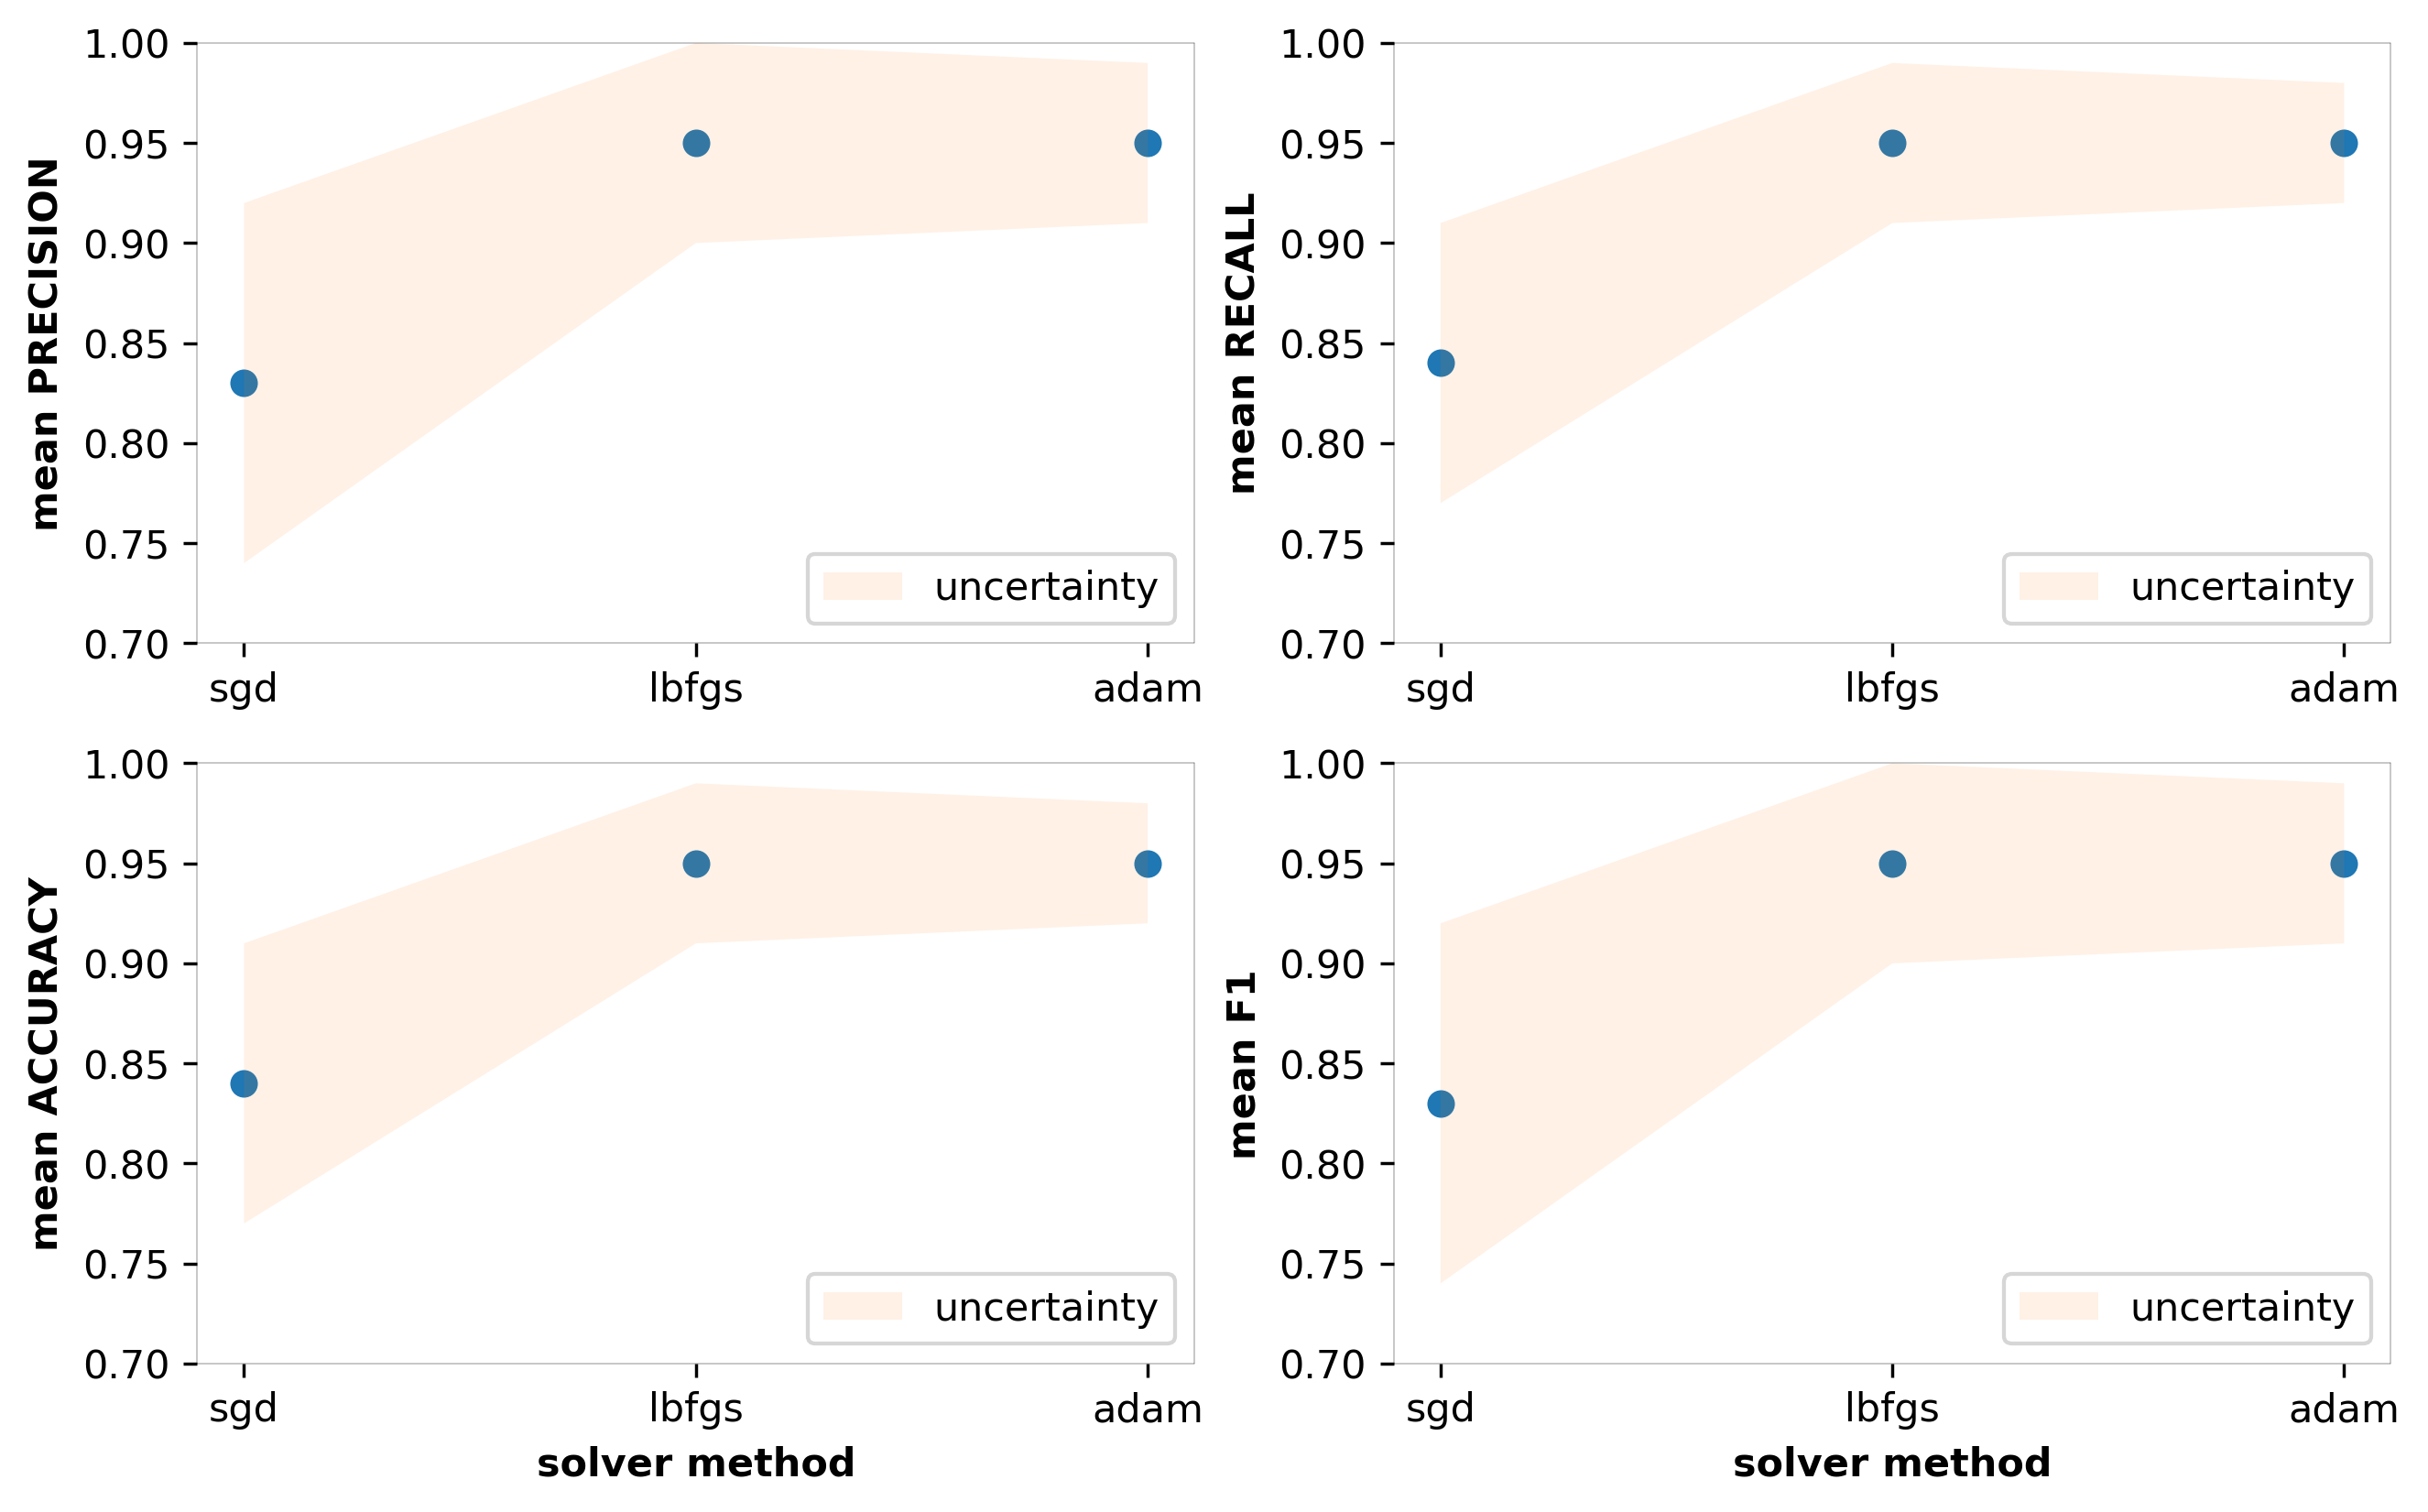

In [41]:
plt.rcParams['figure.figsize']  = (fig_width, fig_height)
plt.rcParams['figure.dpi']      = fig_resolution*5
plt.rcParams["axes.titlesize"]  = "12"
plt.rcParams["axes.labelsize"]  = "10"

xx = [0,1,2]
plt.subplot(2,2,1)
plt.scatter(metrics_MLP["solver"], metrics_MLP["mean precision"])
plt.ylabel('mean PRECISION')
plt.gca().fill_between(
    xx,
    metrics_MLP["mean precision"]-metrics_MLP["std precision"],
    metrics_MLP["mean precision"]+metrics_MLP["std precision"],
    alpha = 0.1,
    label = "uncertainty")
plt.xticks(xx,method)
plt.ylim(ylim)
plt.legend(loc="lower right")

plt.subplot(2,2,2)
plt.scatter(metrics_MLP["solver"], metrics_MLP["mean recall"])
plt.ylabel('mean RECALL')
plt.gca().fill_between(
    xx,
    metrics_MLP["mean recall"]-metrics_MLP["std recall"],
    metrics_MLP["mean recall"]+metrics_MLP["std recall"],
    alpha = 0.1,
    label = "uncertainty")
plt.xticks(xx,method)
plt.ylim(ylim)
plt.legend(loc="lower right")

plt.subplot(2,2,3)
plt.scatter(metrics_MLP["solver"], metrics_MLP["mean accuracy"])
plt.xlabel('solver method')
plt.ylabel('mean ACCURACY')
plt.gca().fill_between(
    xx,
    metrics_MLP["mean accuracy"]-metrics_MLP["std accuracy"],
    metrics_MLP["mean accuracy"]+metrics_MLP["std accuracy"],
    alpha = 0.1,
    label = "uncertainty")
plt.xticks(xx,method)
plt.ylim(ylim)
plt.legend(loc="lower right")

plt.subplot(2,2,4)
plt.scatter(metrics_MLP["solver"], metrics_MLP["mean F1"])
plt.xlabel('solver method')
plt.ylabel('mean F1')
plt.gca().fill_between(
    xx,
    metrics_MLP["mean F1"]-metrics_MLP["std F1"],
    metrics_MLP["mean F1"]+metrics_MLP["std F1"],
    alpha = 0.1,
    label = "uncertainty")
plt.xticks(xx,method)
plt.ylim(ylim)
plt.legend(loc="lower right")

plt.show()

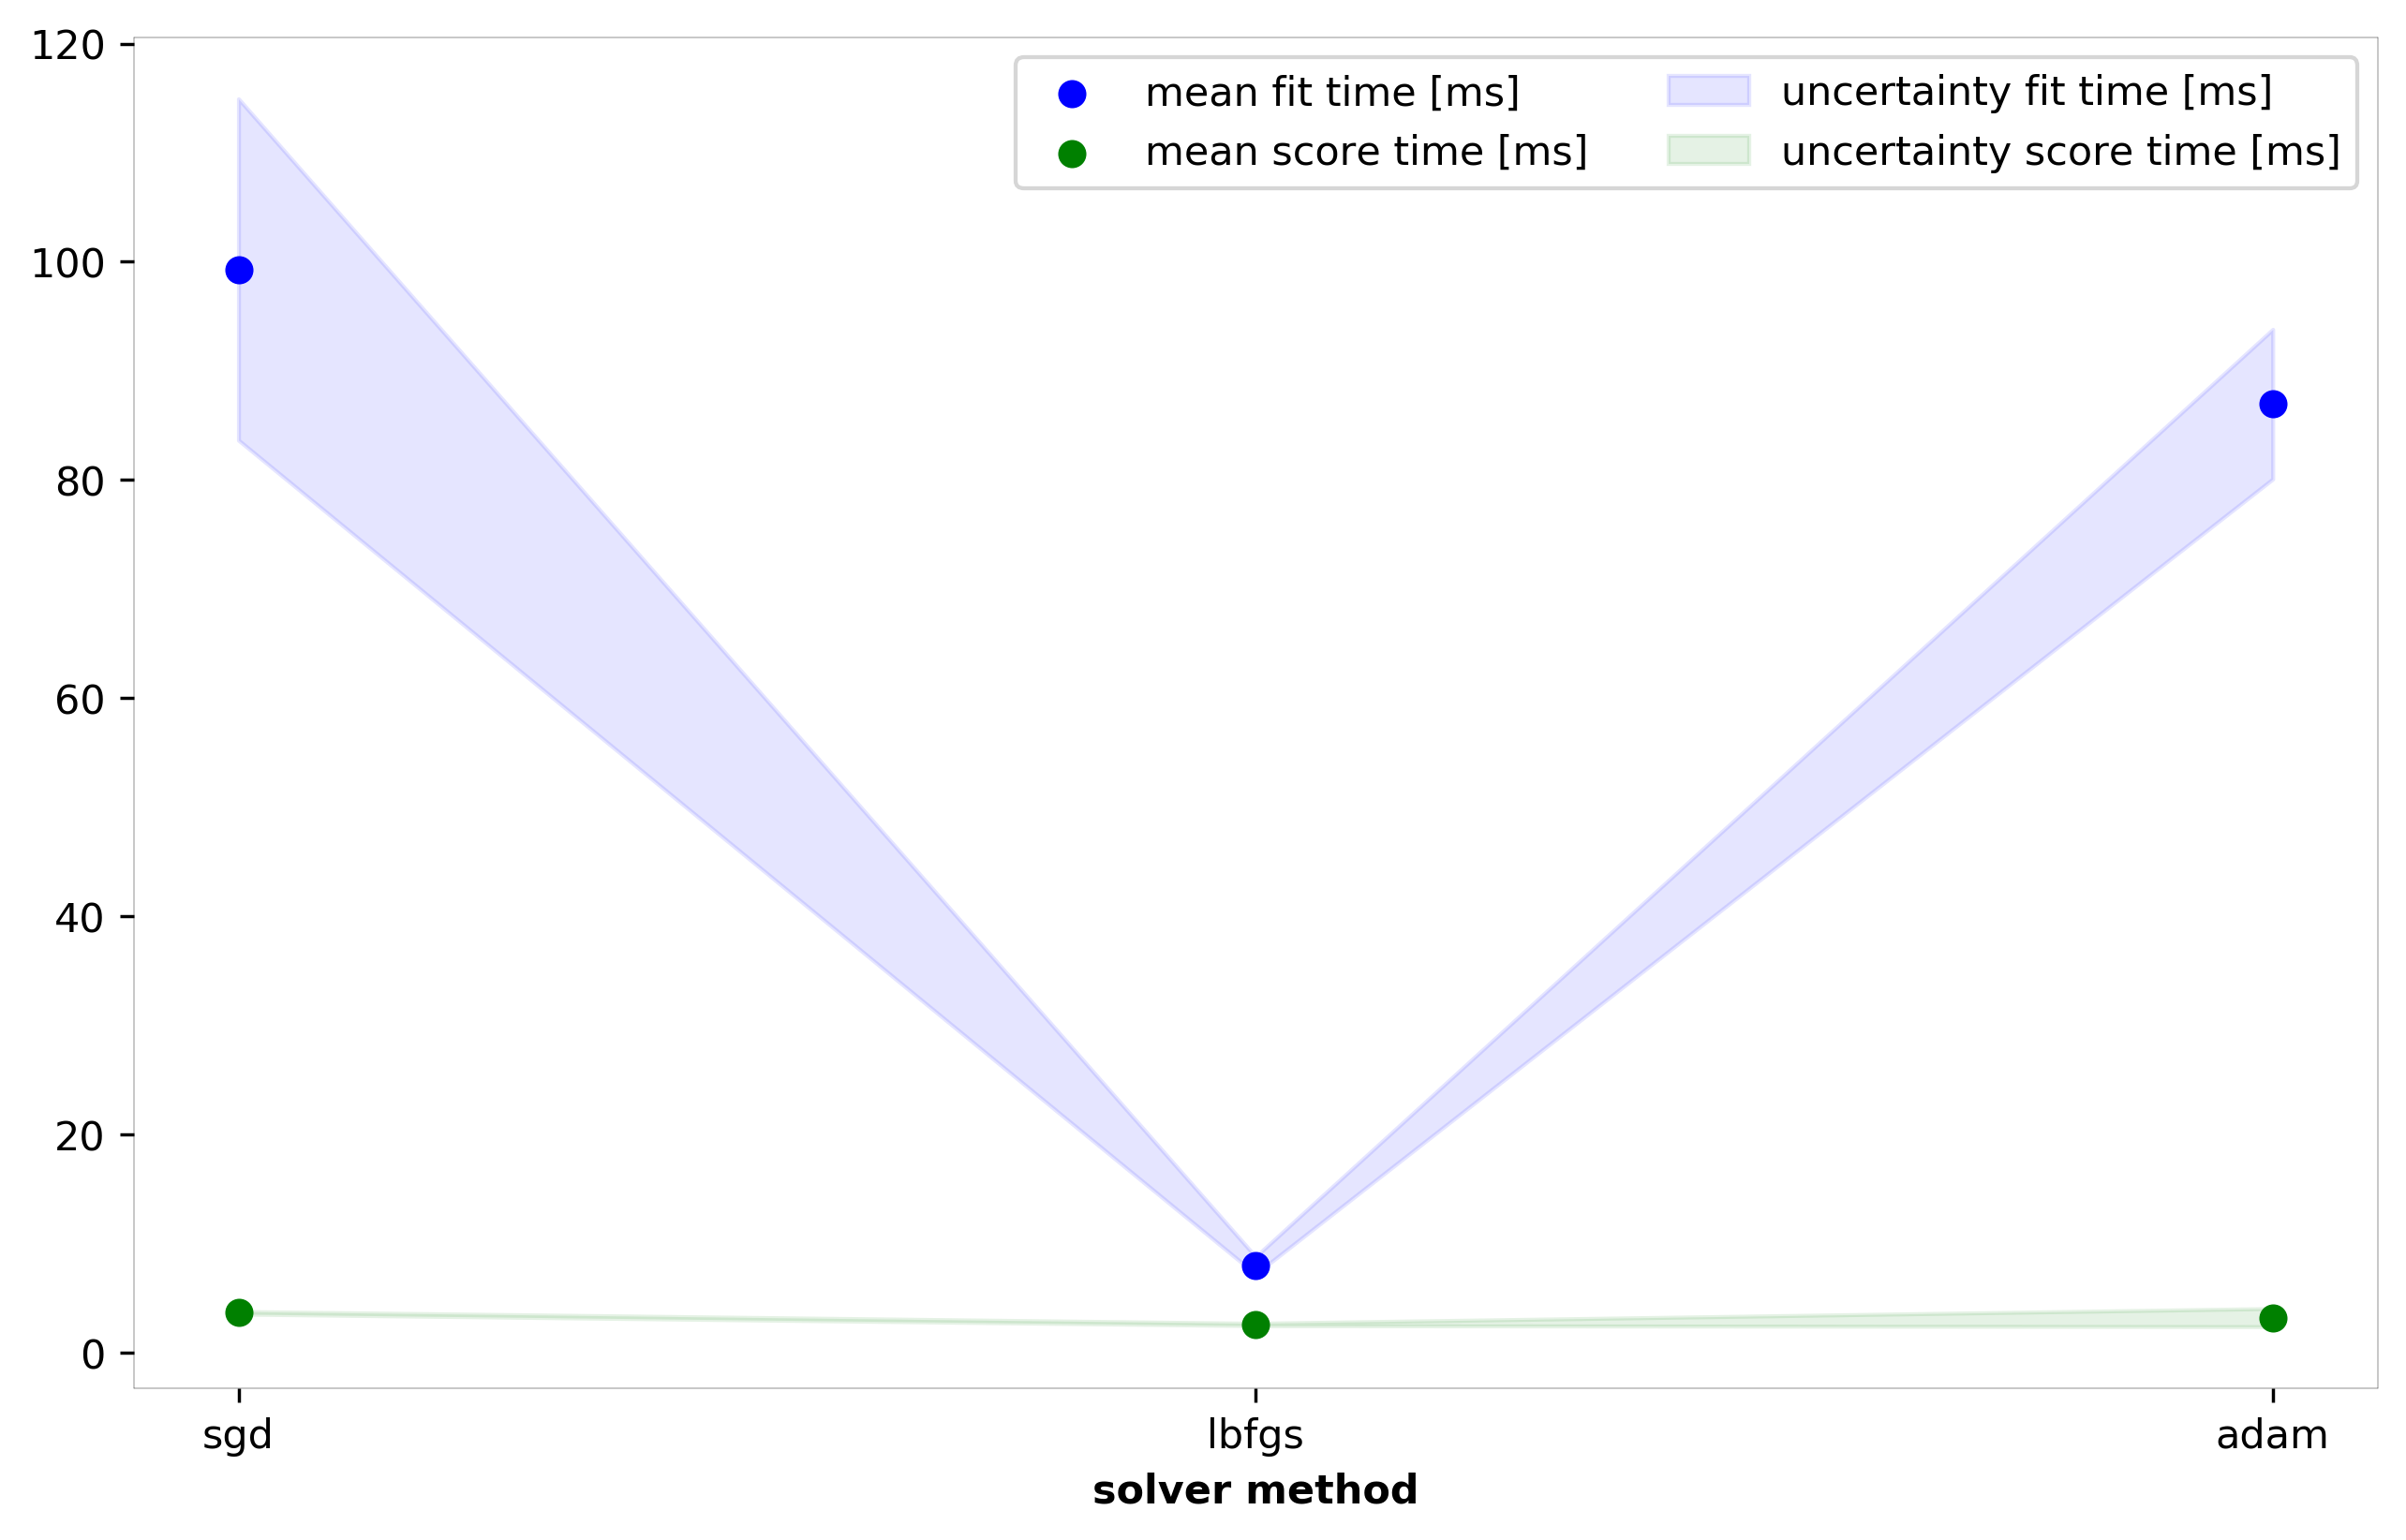

In [43]:
plt.scatter(metrics_MLP["solver"], metrics_MLP["mean fit times [ms]"],color="blue",label="mean fit time [ms]")
plt.scatter(metrics_MLP["solver"], metrics_MLP["mean score times [ms]"],color="green",label="mean score time [ms]")
plt.xlabel('solver method')
plt.gca().fill_between(
    xx,
    metrics_MLP["mean fit times [ms]"]-metrics_MLP["std fit times [ms]"],
    metrics_MLP["mean fit times [ms]"]+metrics_MLP["std fit times [ms]"],
    color = "blue",
    alpha=0.1,
    label="uncertainty fit time [ms]")

plt.gca().fill_between(
    xx,
    metrics_MLP["mean score times [ms]"]-metrics_MLP["std score times [ms]"],
    metrics_MLP["mean score times [ms]"]+metrics_MLP["std score times [ms]"],
    color="green",
    alpha=0.1,
    label="uncertainty score time [ms]")
plt.legend(ncol=2)
plt.xticks(xx,solvers)
plt.show()

### c/ MLP - activation

In [44]:
gs_MLP = GridSearchCV(
    MLPClassifier(),
    param_grid          = {"activation":['identity','logistic','relu','tanh','softmax']},
    scoring             = scoring,
    refit               = False,
    return_train_score  = True,
    cv                  = 5,
)

gs_MLP.fit(X_train,y_train)
results_MLP         = gs_MLP.cv_results_

method              = ['identity','logistic','relu','tanh','softmax']
mean_fit_times      = np.round(results_MLP['mean_fit_time']*1e3,2)
std_fit_times       = np.round(results_MLP['std_fit_time']*1e3,2)
mean_score_times    = np.round(results_MLP['mean_score_time']*1e3,2)
std_score_times     = np.round(results_MLP['std_score_time']*1e3,2)
mean_test_accuracy  = np.round(results_MLP['mean_test_Accuracy'],2)
std_test_accuracy   = np.round(results_MLP['std_test_Accuracy'],2)
mean_test_precision = np.round(results_MLP['mean_test_Precision'],2)
std_test_precision  = np.round(results_MLP['std_test_Precision'],2)
mean_test_recall    = np.round(results_MLP['mean_test_Recall'],2)
std_test_recall     = np.round(results_MLP['std_test_Recall'],2)
mean_test_f1        = np.round(results_MLP['mean_test_F1'],2)
std_test_f1         = np.round(results_MLP['std_test_F1'],2)

metrics_MLP         = np.zeros((5,13))
metrics_MLP[:,1]    = mean_fit_times
metrics_MLP[:,2]    = std_fit_times
metrics_MLP[:,3]    = mean_score_times
metrics_MLP[:,4]    = std_score_times
metrics_MLP[:,5]    = mean_test_accuracy
metrics_MLP[:,6]    = std_test_accuracy
metrics_MLP[:,7]    = mean_test_precision
metrics_MLP[:,8]    = std_test_precision
metrics_MLP[:,9]    = mean_test_accuracy
metrics_MLP[:,10]   = std_test_accuracy
metrics_MLP[:,11]   = mean_test_precision
metrics_MLP[:,12]   = std_test_precision
metrics_MLP         = pd.DataFrame(metrics_MLP)
metrics_MLP.columns = [
    "method",
    "mean fit times [ms]",
    "std fit times [ms]",
    "mean score times [ms]",
    "std score times [ms]",
    "mean accuracy",
    "std accuracy",
    "mean precision",
    "std precision",
    "mean recall",
    "std recall",
    "mean F1",
    "std F1",
    ]
metrics_MLP['method'] = method
metrics_MLP

/home/louis/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/louis/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/louis/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/louis/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/louis/.local/lib/python3.8/site-packages/sklearn/n

method  mean fit times [ms]  std fit times [ms]  mean score times [ms]  \
0  identity                87.05                4.98                   3.64   
1  logistic                91.83               12.55                   3.39   
2      relu                86.89                8.27                   3.05   
3      tanh               100.43                7.47                   3.05   
4   softmax                 1.98                0.14                   0.00   

   std score times [ms]  mean accuracy  std accuracy  mean precision  \
0                  0.19           0.95          0.00            0.95   
1                  0.85           0.90          0.03            0.90   
2                  0.61           0.96          0.02            0.96   
3                  0.35           0.97          0.02            0.97   
4                  0.00            NaN           NaN             NaN   

   std precision  mean recall  std recall  mean F1  std F1  
0           0.01         0.95        0.00     0.95    0.01  
1           0.04         0.90        0.03     0.90    0.04  
2           0.02         0.96        0.02     0.96    0.02  
3           0.02         0.97        0.02     0.97    0.02  
4            NaN          NaN         NaN      NaN     NaN

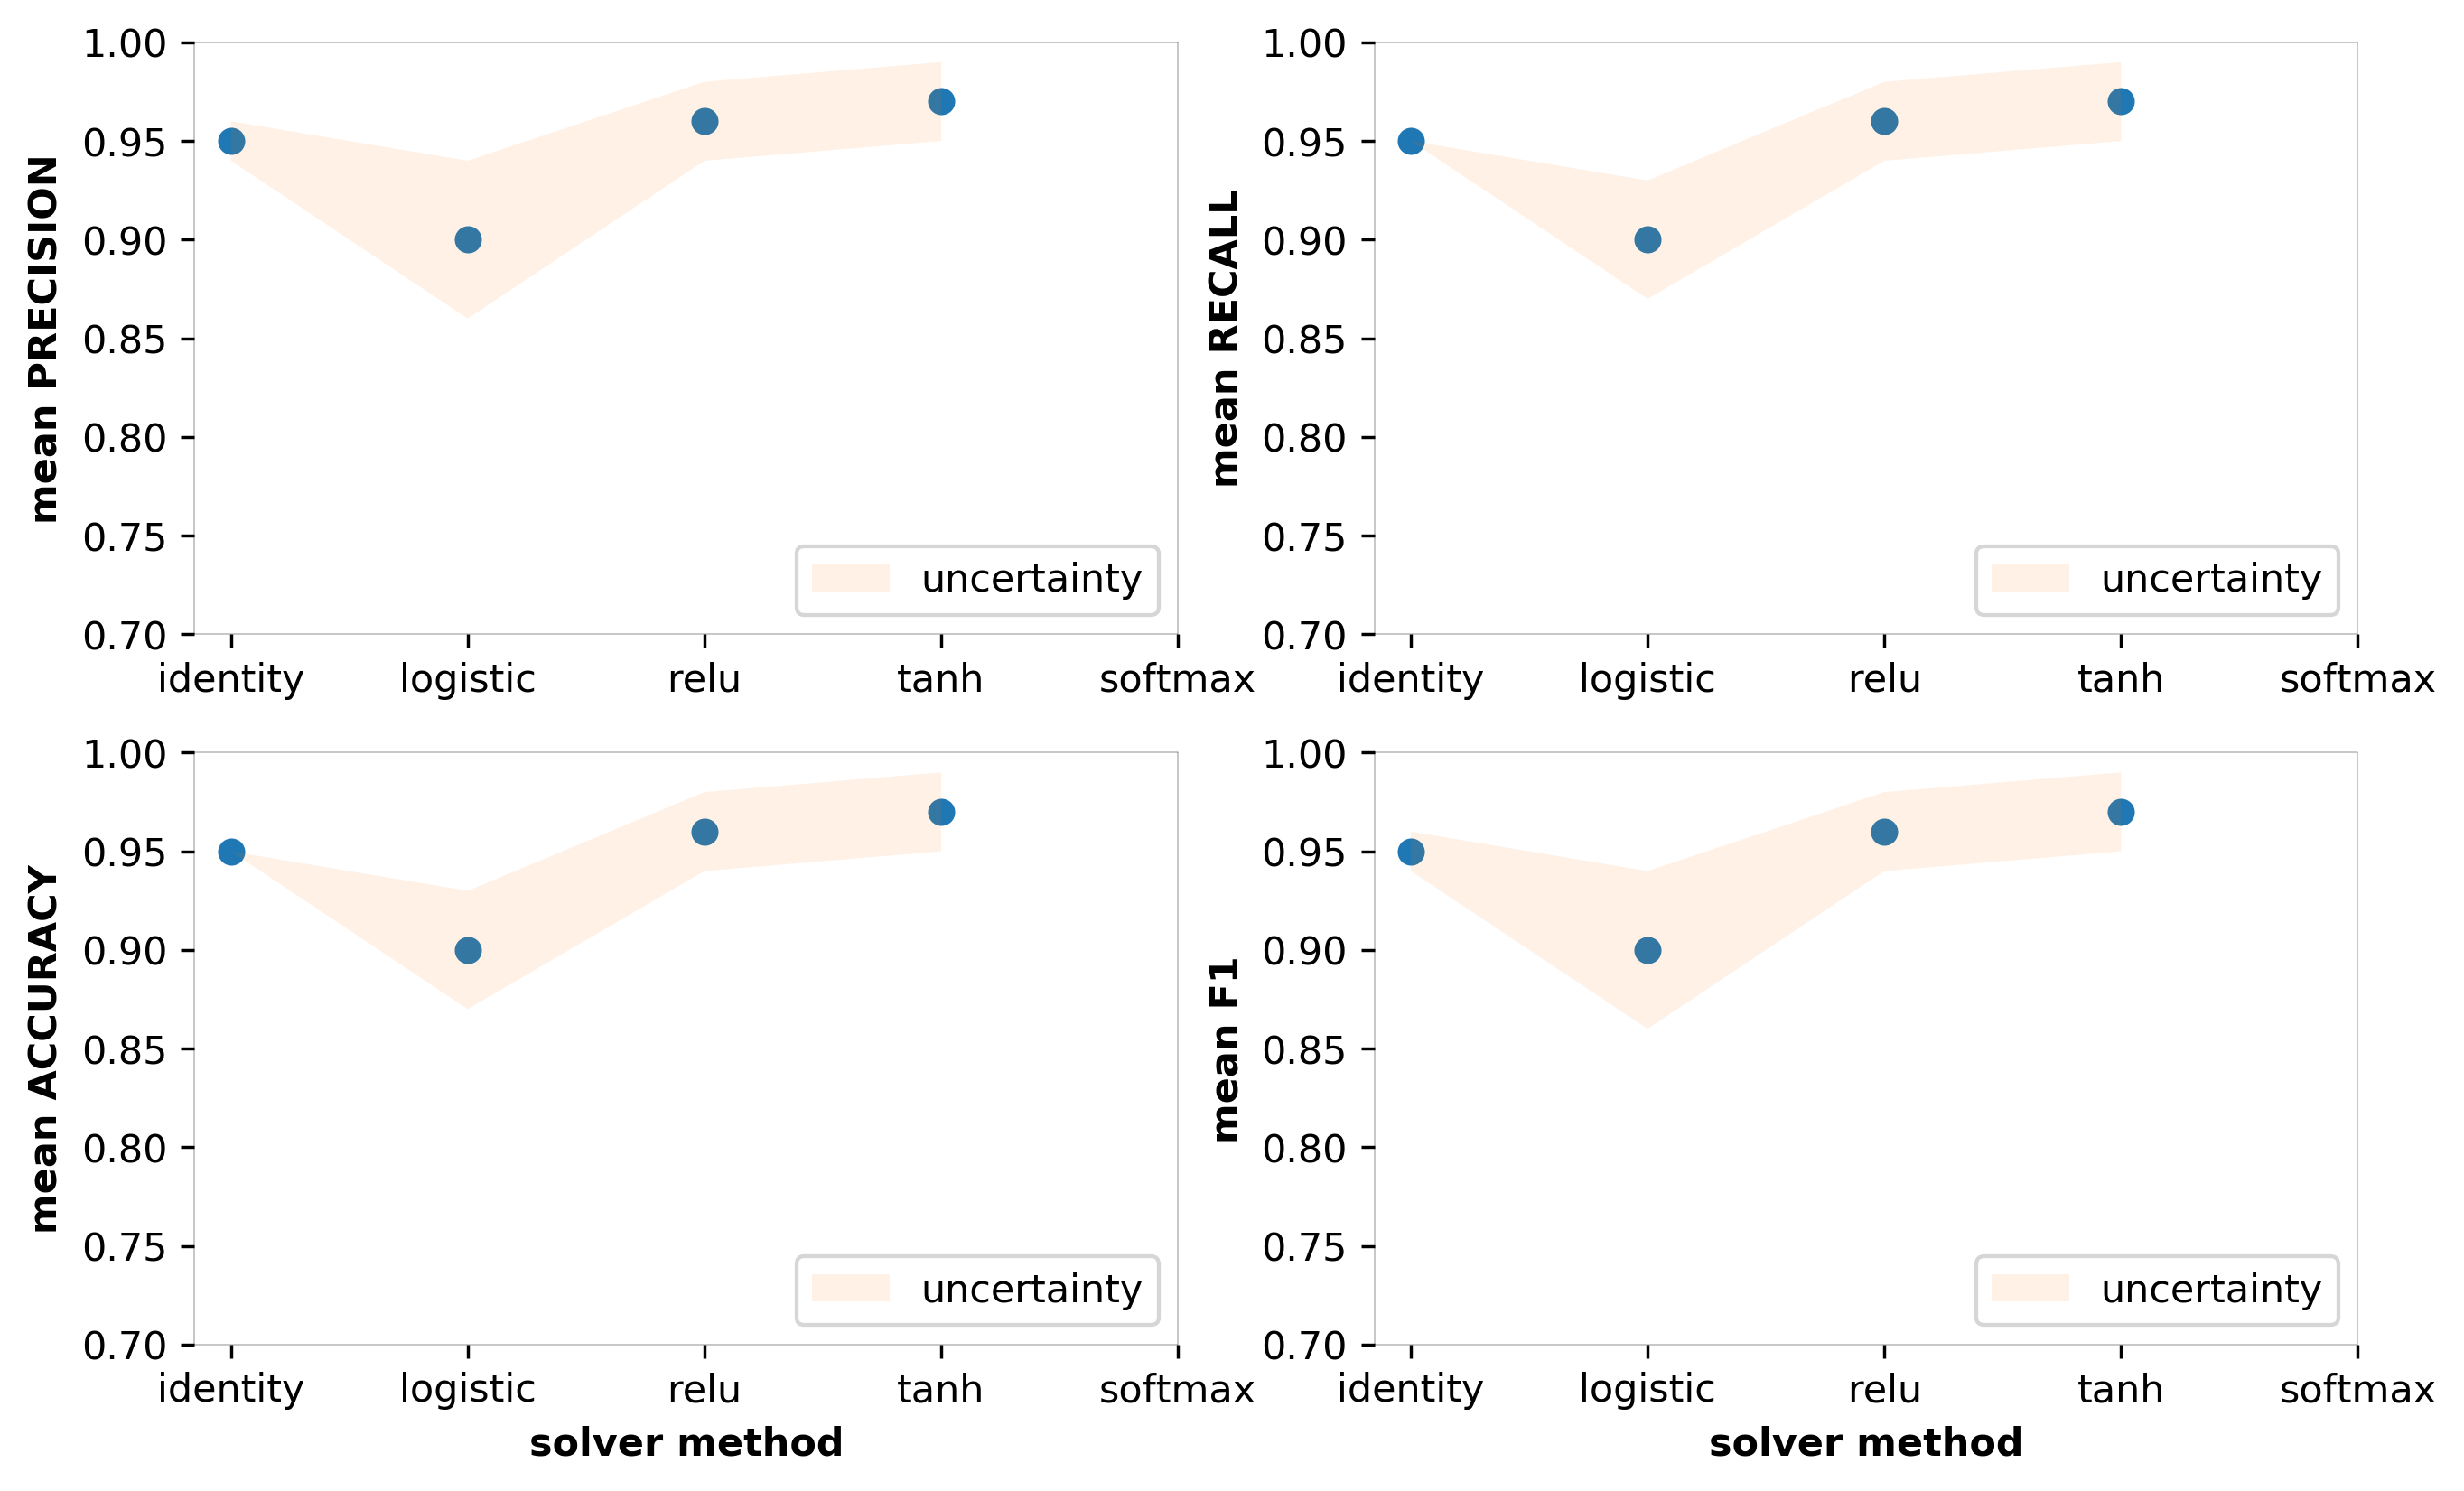

In [45]:
plt.rcParams['figure.figsize']  = (fig_width, fig_height)
plt.rcParams['figure.dpi']      = fig_resolution*5
plt.rcParams["axes.titlesize"]  = "12"
plt.rcParams["axes.labelsize"]  = "10"

xx      = [0,1,2,3,4]
ylim    = [0.7,1]

plt.subplot(2,2,1)
plt.scatter(metrics_MLP["method"], metrics_MLP["mean precision"])
plt.ylabel('mean PRECISION')
plt.gca().fill_between(
    xx,
    metrics_MLP["mean precision"]-metrics_MLP["std precision"],
    metrics_MLP["mean precision"]+metrics_MLP["std precision"],
    alpha = 0.1,
    label = "uncertainty")
plt.xticks(xx,method)
plt.ylim(ylim)
plt.legend(loc="lower right")

plt.subplot(2,2,2)
plt.scatter(metrics_MLP["method"], metrics_MLP["mean recall"])
plt.ylabel('mean RECALL')
plt.gca().fill_between(
    xx,
    metrics_MLP["mean recall"]-metrics_MLP["std recall"],
    metrics_MLP["mean recall"]+metrics_MLP["std recall"],
    alpha = 0.1,
    label = "uncertainty")
plt.xticks(xx,method)
plt.ylim(ylim)
plt.legend(loc="lower right")

plt.subplot(2,2,3)
plt.scatter(metrics_MLP["method"], metrics_MLP["mean accuracy"])
plt.xlabel('solver method')
plt.ylabel('mean ACCURACY')
plt.gca().fill_between(
    xx,
    metrics_MLP["mean accuracy"]-metrics_MLP["std accuracy"],
    metrics_MLP["mean accuracy"]+metrics_MLP["std accuracy"],
    alpha = 0.1,
    label = "uncertainty")
plt.xticks(xx,method)
plt.ylim(ylim)
plt.legend(loc="lower right")

plt.subplot(2,2,4)
plt.scatter(metrics_MLP["method"], metrics_MLP["mean F1"])
plt.xlabel('solver method')
plt.ylabel('mean F1')
plt.gca().fill_between(
    xx,
    metrics_MLP["mean F1"]-metrics_MLP["std F1"],
    metrics_MLP["mean F1"]+metrics_MLP["std F1"],
    alpha = 0.1,
    label = "uncertainty")
plt.xticks(xx,method)
plt.ylim(ylim)
plt.legend(loc="lower right")

plt.show()

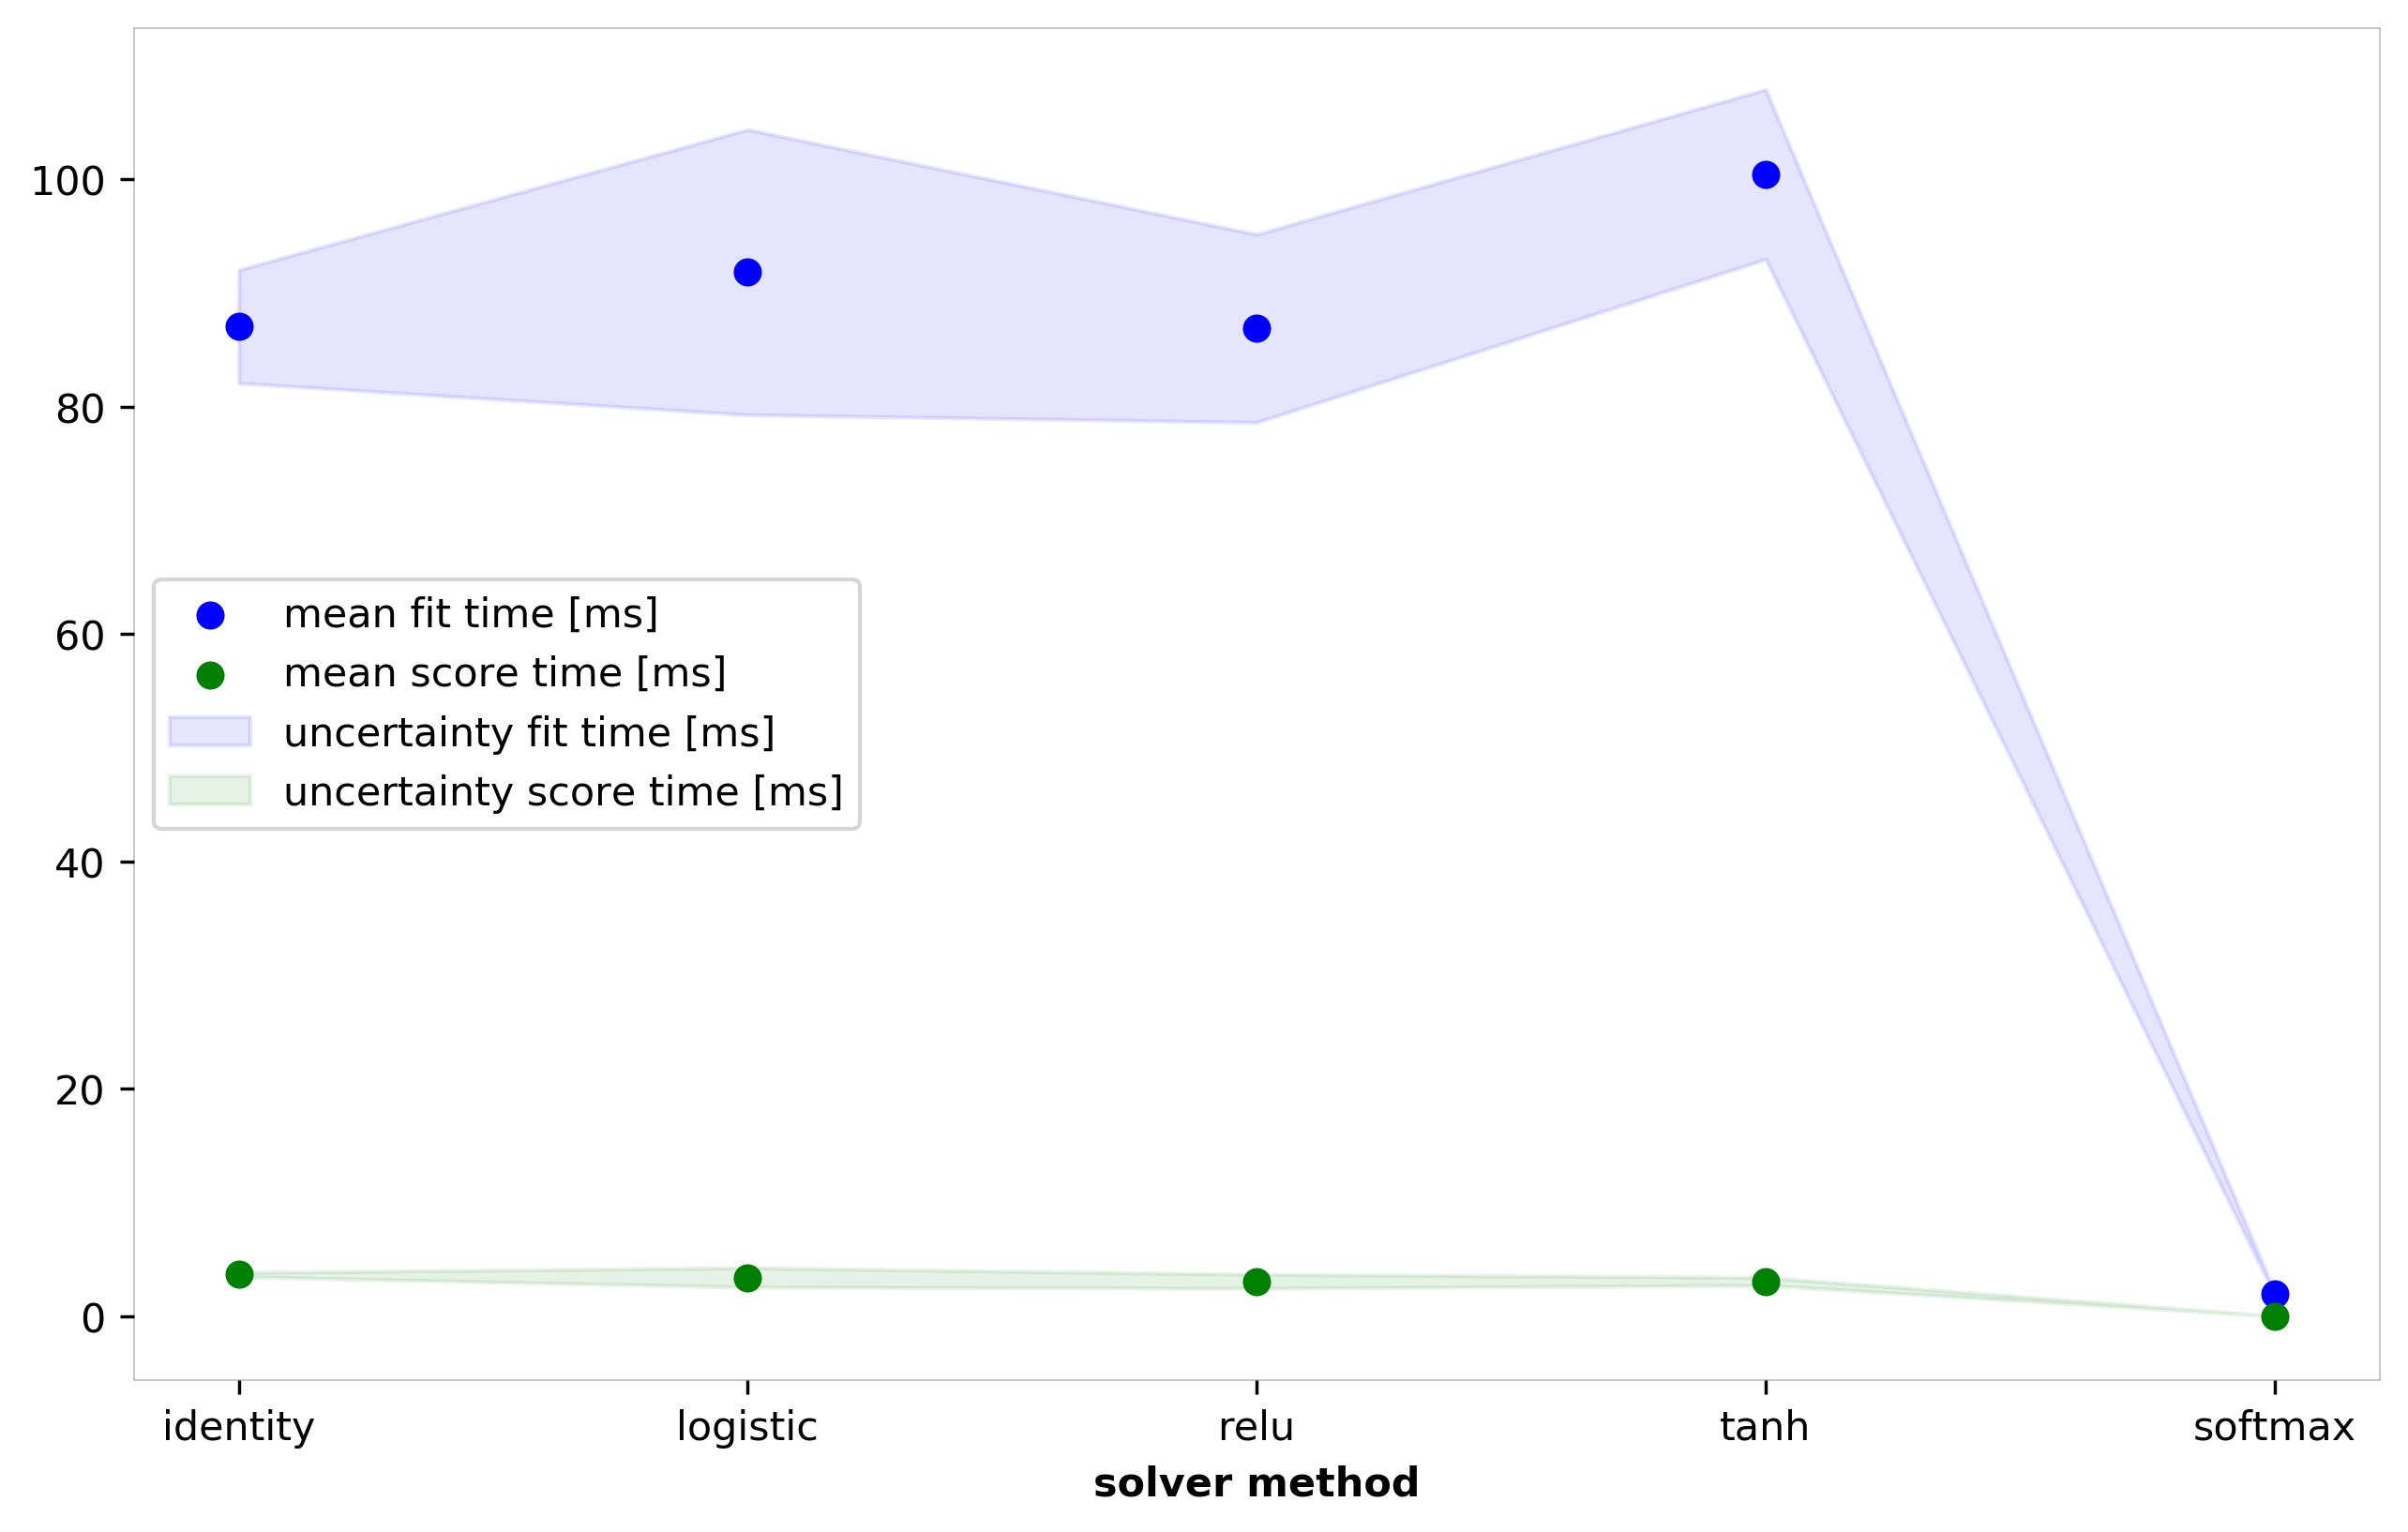

In [46]:
plt.scatter(metrics_MLP["method"], metrics_MLP["mean fit times [ms]"],color="blue",label="mean fit time [ms]")
plt.scatter(metrics_MLP["method"], metrics_MLP["mean score times [ms]"],color="green",label="mean score time [ms]")
plt.xlabel('solver method')
plt.gca().fill_between(
    xx,
    metrics_MLP["mean fit times [ms]"]-metrics_MLP["std fit times [ms]"],
    metrics_MLP["mean fit times [ms]"]+metrics_MLP["std fit times [ms]"],
    color = "blue",
    alpha = 0.1,
    label = "uncertainty fit time [ms]")

plt.gca().fill_between(
    xx,
    metrics_MLP["mean score times [ms]"]-metrics_MLP["std score times [ms]"],
    metrics_MLP["mean score times [ms]"]+metrics_MLP["std score times [ms]"],
    color = "green",
    alpha = 0.1,
    label = "uncertainty score time [ms]")
plt.legend(loc="center left")
plt.xticks(xx,method)
plt.show()